#
<FONT size="10pt"> <center>Projet 3</center></FONT>. 

**Openclassroom** : https://openclassrooms.com/fr/paths/164/projects/628/assignment

- L'agence **"Santé publique France"** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.

**Les données:**

- Le jeu de données Open Food Facts est disponible sur le site officiel.

- Les champs sont séparés en quatre sections :
    - Les informations générales sur la fiche du produit : nom, date de modification, etc.
    - Un ensemble de tags : catégorie du produit, localisation, origine, etc.
    - Les ingrédients composant les produits et leurs additifs éventuels.
    - Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

**Votre mission:**

1) Traiter le jeu de données, en :

    - Réfléchissant à une idée d’application.
    - Repérant des variables pertinentes pour les traitements à venir, et nécessaires pour votre idée d’application.
    - Nettoyant les données en :
        - mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
        - identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.
    - Automatisant ces traitements pour éviter de répéter ces opérations

2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

**L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.**

3) Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.

4) Justifier votre idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

5) Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.
    - Un notebook du nettoyage des données (non cleané, pour comprendre votre démarche). 
    - Un notebook d’exploration comportant une analyse univariée, multivariée, une réduction dimensionnelle, ainsi que les différentes questions de recherches associées (non cleané, pour comprendre votre démarche).
    - Une présentation, à utiliser en support pour la soutenance, comprenant :
        - La présentation de votre idée d’application.
        - Les opérations de nettoyage effectuées.
        - La description et l'analyse univariée des différentes variables importantes avec les visualisations associées.
        - L’analyse multivariée et les résultats statistiques associés, en lien avec votre idée d’application.
        - 3 observations solidement étayées (graphes et/ou tests statistiques à l’appui au besoin) évaluant la pertinence et la faisabilité de votre application.
        - La synthèse des différentes conclusions sur la faisabilité de votre projet.



# 1 : Librairies et options

In [1]:
import pandas as pd
import numpy as np
from googletrans import Translator
import math
import seaborn as sns
import matplotlib.pyplot as plt
import googletrans
from googletrans import Translator
import colorcet as cc
from tqdm import tqdm
import random
import missingno as msno
import scipy
from sklearn.preprocessing import MinMaxScaler


pd.options.display.max_columns = 200
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = 200
pd.set_option('mode.chained_assignment', None) # Pour ne pas avoir de message d'erreur quand on crée nouvelle df à partir d'une autre (app)

# 2 : Ouvertures des fichiers

In [2]:
# Importer le fichier :
DataFinal = pd.read_csv('DataFinal.csv')
DfNettoyage = pd.read_csv('DfNettoyage.csv')

- **Il n'y a plus d'erreurs de types dans les colonnes une fois la DF néttoyée.**

# 3 : Analyse Univariée

In [3]:
# Description des variables ingrédients (Moyenne, Min, Max et quartiles)
Ingredients = ['saturated-fat_100g', 'energy_100g', 'sodium_100g', 'salt_100g', 'proteins_100g', 'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g']
DataFinal[Ingredients].describe()

saturated-fat_100g   energy_100g   sodium_100g     salt_100g  \
count        40003.000000  40003.000000  40003.000000  40003.000000   
mean             5.347587   1095.736395      0.340637      0.865219   
std              8.394076    797.514511      0.698529      1.774717   
min              0.000000      0.000000      0.000000      0.000000   
25%              0.300000    400.000000      0.025000      0.063500   
50%              1.860000   1003.000000      0.220472      0.560000   
75%              7.400000   1644.000000      0.472441      1.200000   
max            210.000000  18700.000000     83.000000    211.000000   

       proteins_100g   sugars_100g      fat_100g  carbohydrates_100g  \
count   40003.000000  40003.000000  40003.000000        40003.000000   
mean        7.618769     12.732808     12.578654           25.664863   
std         7.297607     18.368769     16.963738           27.248558   
min         0.000000     -0.100000      0.000000            0.000000   
25%         1.600000      1.000000      0.600000            2.500000   
50%         6.000000      4.000000      5.500000           12.300000   
75%        11.000000     15.550000     20.000000           51.600000   
max        86.000000    100.000000    380.000000          190.000000   

         fiber_100g  
count  40003.000000  
mean       1.660172  
std        3.210939  
min        0.000000  
25%        0.000000  
50%        0.100000  
75%        2.300000  
max       86.200000

- **Il reste des valeurs négatives dans les ingrédients (sucre).**
- **Il y a des ingrédients à plus de 100 pour 100g ce qui n'est pas logique.**
- **La somme des ingrédients réstantes est elle suppérieure à 100g.**

In [4]:
# Suppression des valeurs négatives dans les ingrédients : 
for ingredients in Ingredients :
    DataFinal = DataFinal[DataFinal[ingredients] >= 0]
DataFinal.shape

(40002, 27)

- **Il n'y avait donc que un seul produit avec une valeur négative dans les ingrédients.**

In [5]:
# Suppression des valeurs à plus de 100g/100g pour les catégories nutritives : 
Nut = ['saturated-fat_100g','salt_100g','fat_100g','carbohydrates_100g']

for Nutri in Nut:
    DataFinal = DataFinal[DataFinal[Nutri] <= 100]
DataFinal.shape

(39997, 27)

- **Il y avait donc encore 5 produits avec des valeurs abérrantes.**

In [6]:
# Suppression des produits avec une somme d'ingrédient suppérieure à 100.
Nut = ['salt_100g','fat_100g','proteins_100g','sugars_100g']
Total = DataFinal[Nut].sum(axis = 1).sort_values(ascending = False)
Total = Total.to_frame()
Index = Total[(Total[0] > 100) | (Total[0] == 0)].index
print(len(Index))
DataFinal = DataFinal.drop(index = Index).reset_index(drop = True)

245


- **Il y a des 0 il faut les supprimer.**
- **Il y a des produits suppérieurs à 100.**
- **Il y en avait 245 en tout.**

In [7]:
DataFinal[Ingredients].describe()

saturated-fat_100g   energy_100g   sodium_100g     salt_100g  \
count        39752.000000  39752.000000  39752.000000  39752.000000   
mean             5.346483   1095.645502      0.339570      0.862509   
std              8.283837    787.712964      0.553210      1.405156   
min              0.000000      0.000000      0.000000      0.000000   
25%              0.300000    402.000000      0.027559      0.070000   
50%              1.900000   1006.000000      0.224409      0.570000   
75%              7.400000   1644.000000      0.472441      1.200000   
max            100.000000  15481.000000     30.000000     76.200000   

       proteins_100g   sugars_100g      fat_100g  carbohydrates_100g  \
count   39752.000000  39752.000000  39752.000000        39752.000000   
mean        7.663352     12.773031     12.588355           25.656310   
std         7.291520     18.331290     16.766193           27.140387   
min         0.000000      0.000000      0.000000            0.000000   
25%         1.600000      1.000000      0.600000            2.600000   
50%         6.000000      4.000000      5.500000           12.300000   
75%        11.000000     15.800000     20.000000           51.500000   
max        86.000000    100.000000    100.000000          100.000000   

         fiber_100g  
count  39752.000000  
mean       1.670217  
std        3.218387  
min        0.000000  
25%        0.000000  
50%        0.100000  
75%        2.300000  
max       86.200000

In [8]:
# Ajout de l'étape
Etape12 = ['Etape 12', "Suppression des valeurs abérrantes (négatives, +100 et somme sup à 100)", DataFinal.shape[1], DataFinal.shape[0], round((DataFinal.isna().sum().sum())*100/(DataFinal.shape[0]*DataFinal.shape[1]))]
Etape12 = pd.DataFrame([Etape12], columns = ['Etapes', 'Action', 'NbColonne', 'NbLigne', 'PourcentageNaN'])
DfNettoyage = pd.concat([DfNettoyage, Etape12])

In [9]:
# Analyse univariée par groupe de produits :
colonnes = ['saturated-fat_100g', 'energy_100g', 'sodium_100g', 'salt_100g', 'proteins_100g', 'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g']
Max = []
Min = []
MoyenneMax = []
MoyenneMin = []

for colonne in colonnes:
    maximum = DataFinal.set_index('pnns_groups_2').select_dtypes(exclude = 'object').reset_index().groupby('pnns_groups_2').max().reset_index().sort_values(colonne, ascending = False).iloc[:1]['pnns_groups_2'].values[0]
    Max.append(maximum)
    minimum = DataFinal.set_index('pnns_groups_2').select_dtypes(exclude = 'object').reset_index().groupby('pnns_groups_2').min().reset_index().sort_values(colonne, ascending = False).iloc[:1]['pnns_groups_2'].values[0]
    Min.append(minimum)
    moyennemax = DataFinal.set_index('pnns_groups_2').select_dtypes(exclude = 'object').reset_index().groupby('pnns_groups_2').mean().reset_index().sort_values(colonne, ascending = False).iloc[:1]['pnns_groups_2'].values[0]
    MoyenneMax.append(moyennemax)
    moyennemin = DataFinal.set_index('pnns_groups_2').select_dtypes(exclude = 'object').reset_index().groupby('pnns_groups_2').mean().reset_index().sort_values(colonne).iloc[:1]['pnns_groups_2'].values[0]
    MoyenneMin.append(moyennemin)
    
ar = np.array([Max, Min, MoyenneMax, MoyenneMin])
df = pd.DataFrame(ar, columns = colonnes, index = ['Maximum', 'Minimum', 'MoyenneMaximum', 'MoyenneMinimum'])
df

saturated-fat_100g                        energy_100g  \
Maximum                       Graisses                           Graisses   
Minimum         Produits salés et gras             Produits salés et gras   
MoyenneMaximum                Graisses                           Graisses   
MoyenneMinimum      Nectars des fruits  Boissons sucrées artificiellement   

                       sodium_100g           salt_100g  \
Maximum           Boissons sucrées    Boissons sucrées   
Minimum            Plats de tripes     Plats de tripes   
MoyenneMaximum  Viande transformée  Viande transformée   
MoyenneMinimum  Nectars des fruits  Nectars des fruits   

                                    proteins_100g sugars_100g  \
Maximum                      Boissons non sucrées     Bonbons   
Minimum                                      Œufs       Glace   
MoyenneMaximum                 Viande transformée     Bonbons   
MoyenneMinimum  Boissons sucrées artificiellement    Graisses   

                                         fat_100g          carbohydrates_100g  \
Maximum                      Pansements et sauces                     Bonbons   
Minimum                                 Apéritifs                   Apéritifs   
MoyenneMaximum                           Graisses  Céréales du petit-déjeuner   
MoyenneMinimum  Boissons sucrées artificiellement                        Œufs   

                              fiber_100g  
Maximum         Poisson et fruits de mer  
Minimum                        Apéritifs  
MoyenneMaximum    Produits salés et gras  
MoyenneMinimum      Boissons alcoolisées

- **La ligne minium n'est pas trés précise plusieurs produits de différentes catégories peuvent être à 0.**
- **Les moyennes sont plus intéressantes.**

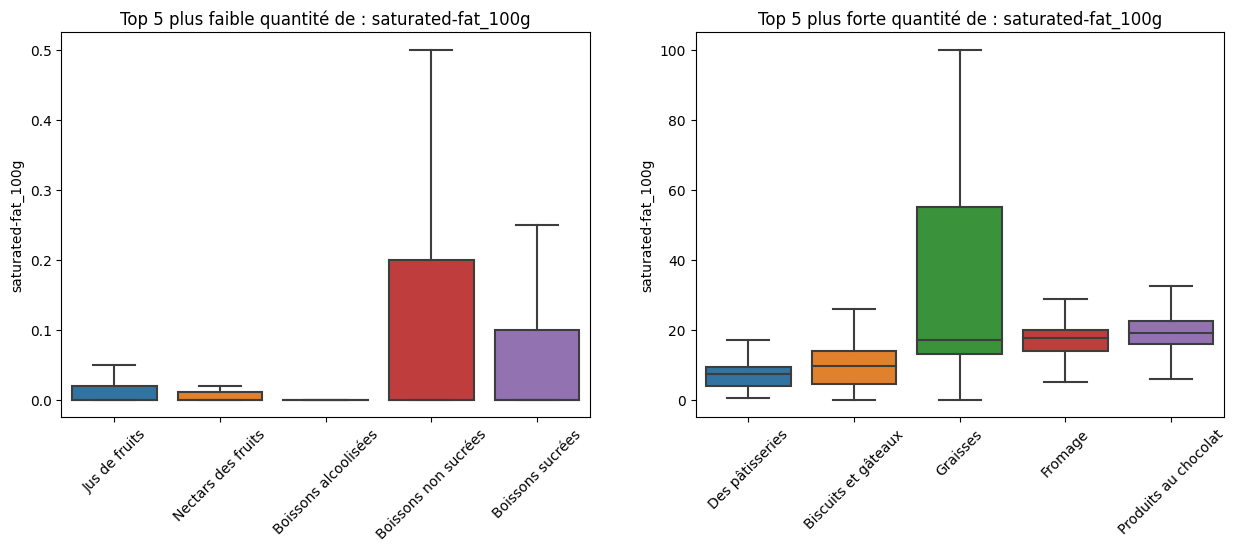

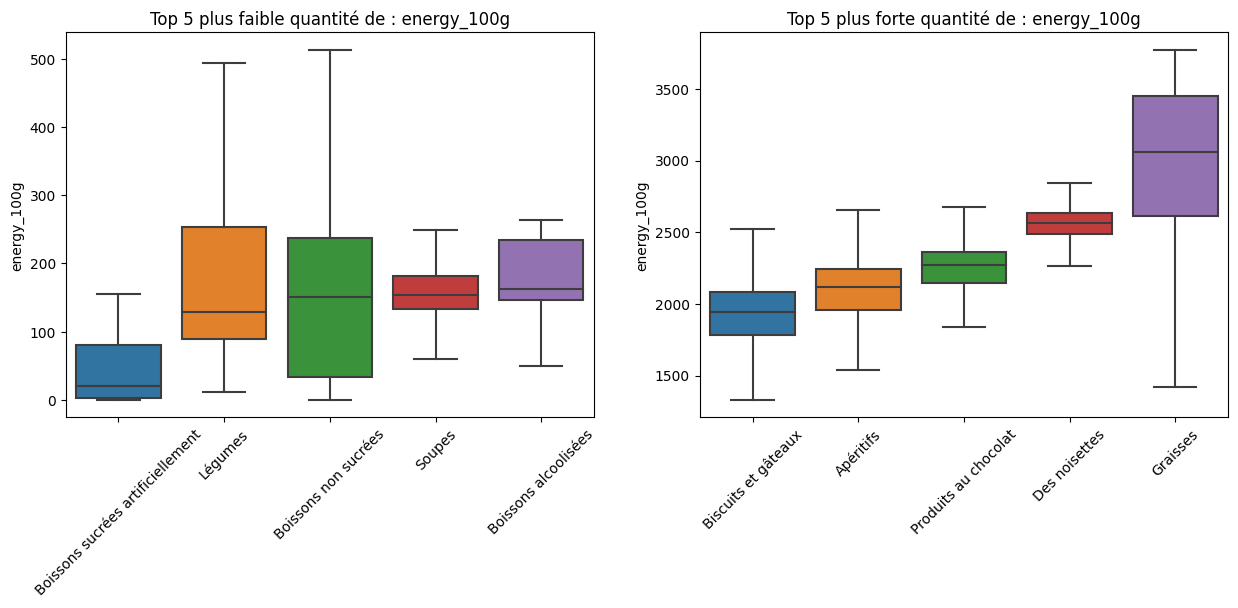

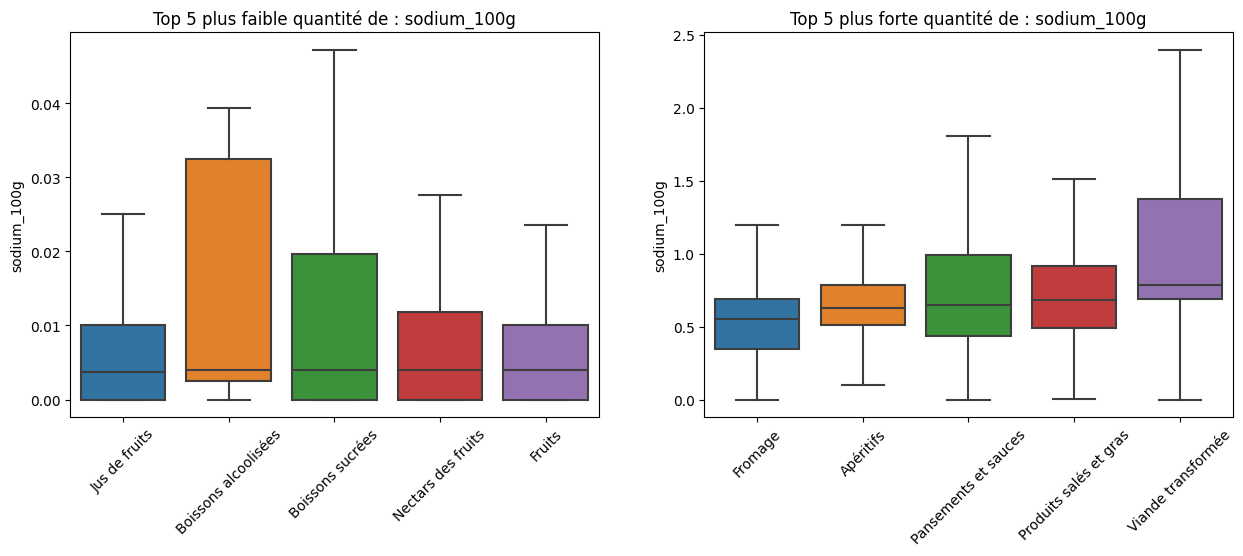

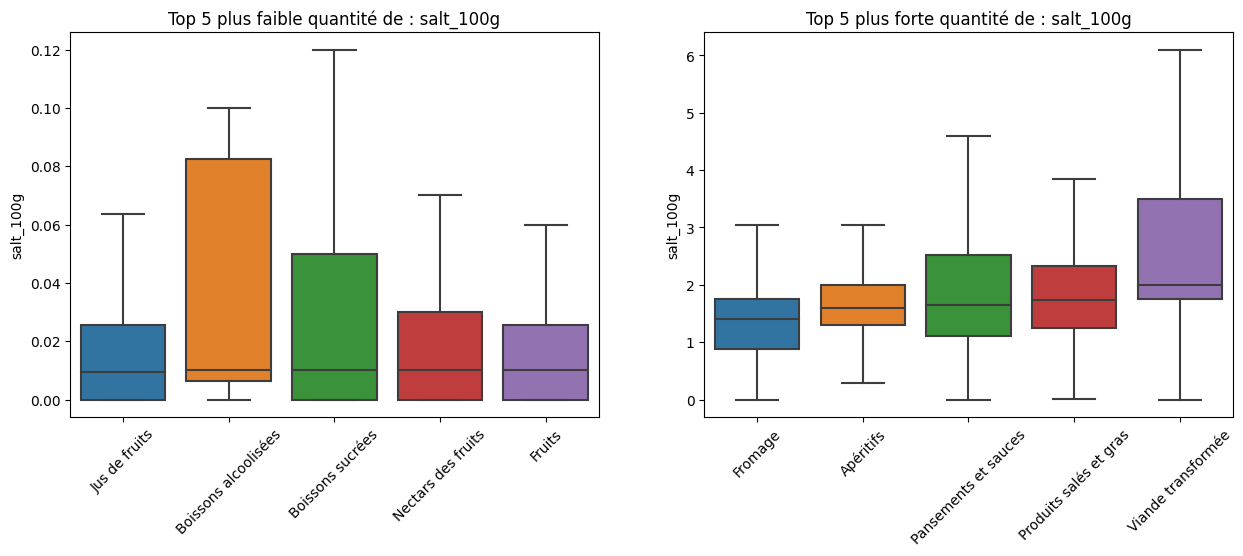

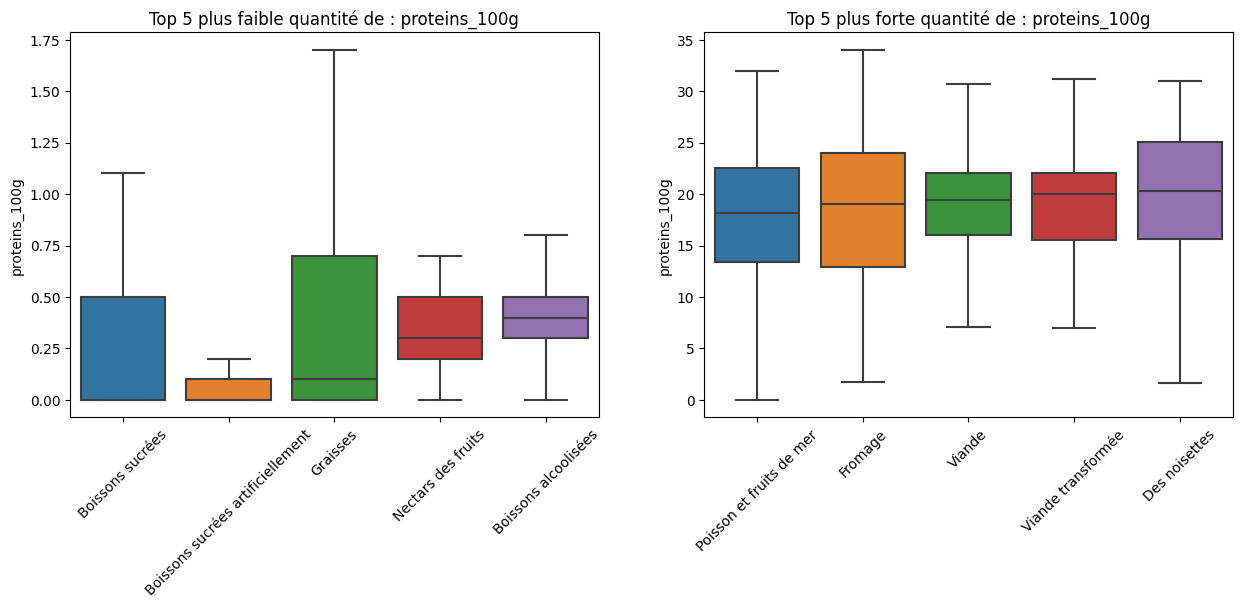

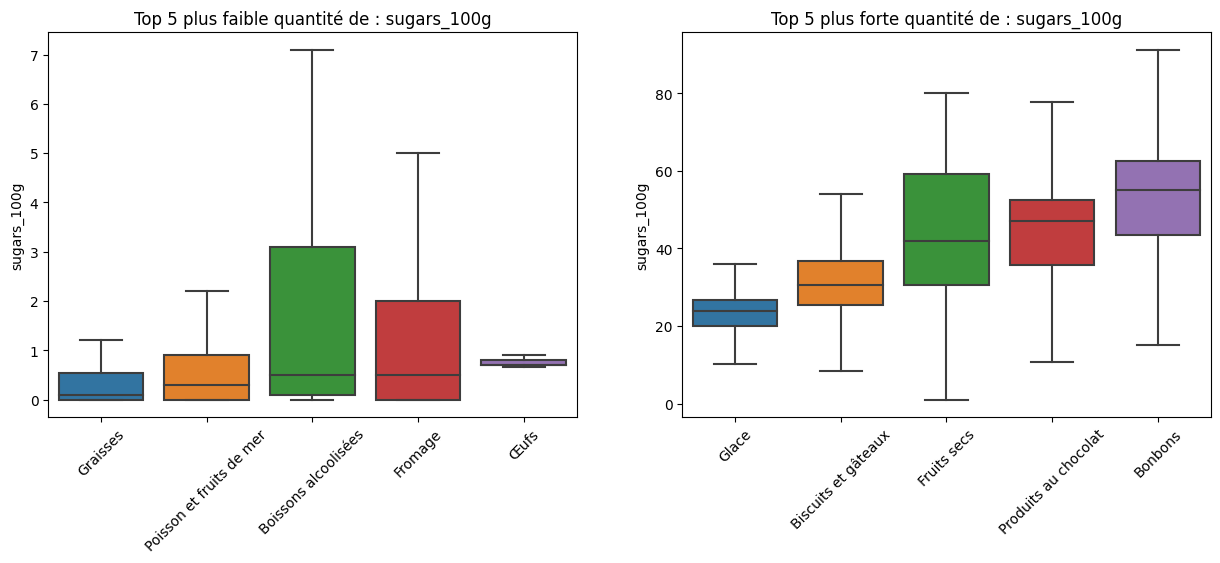

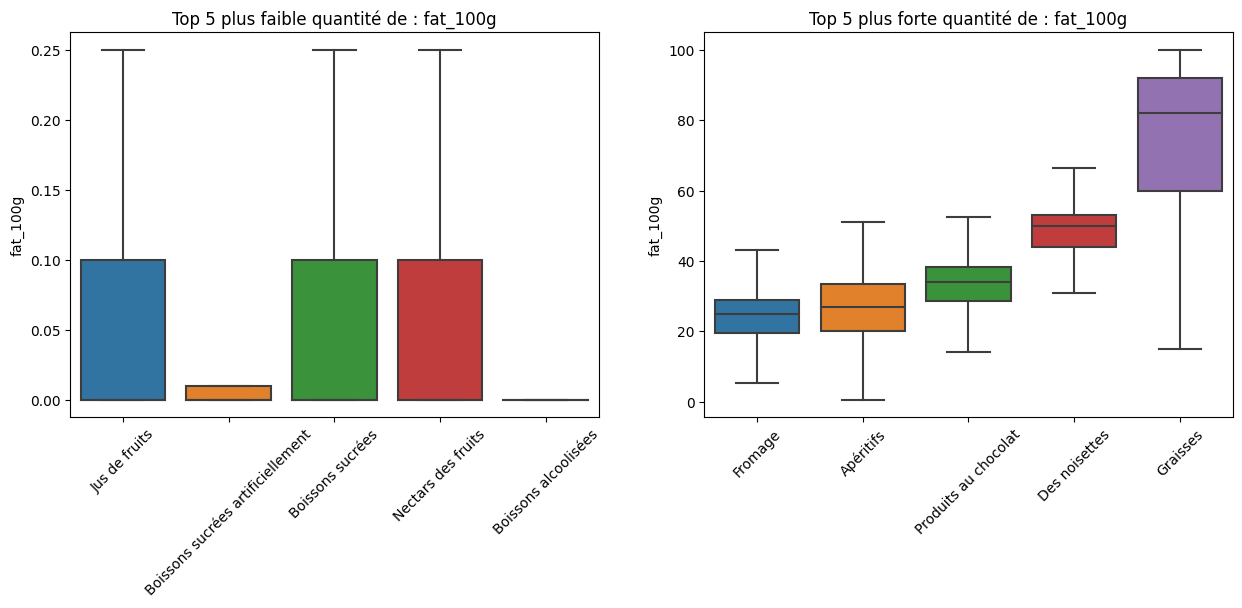

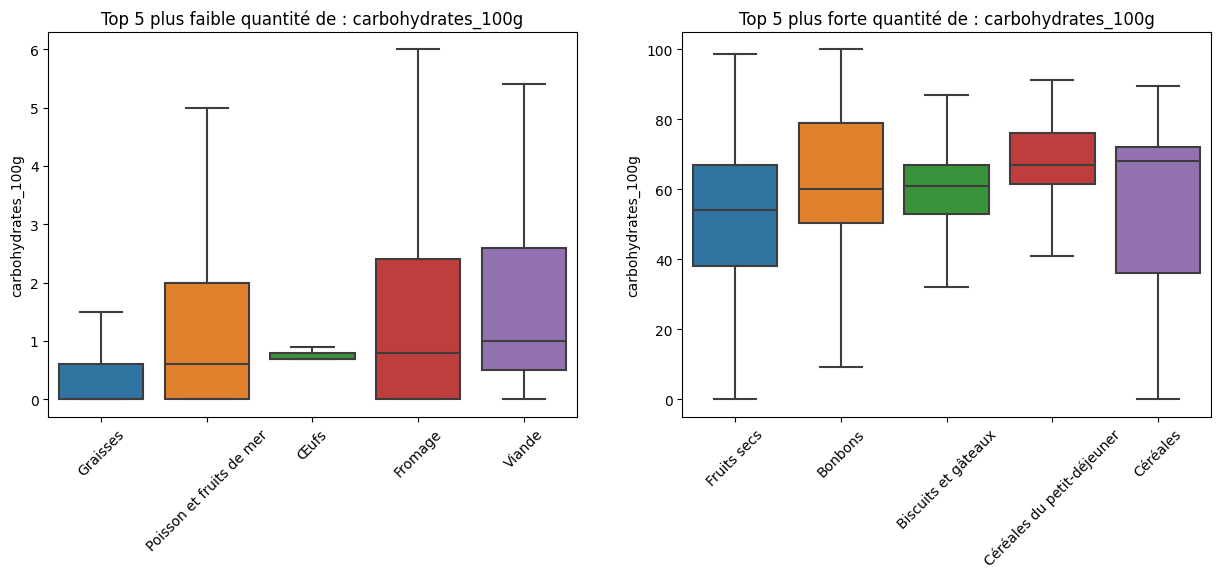

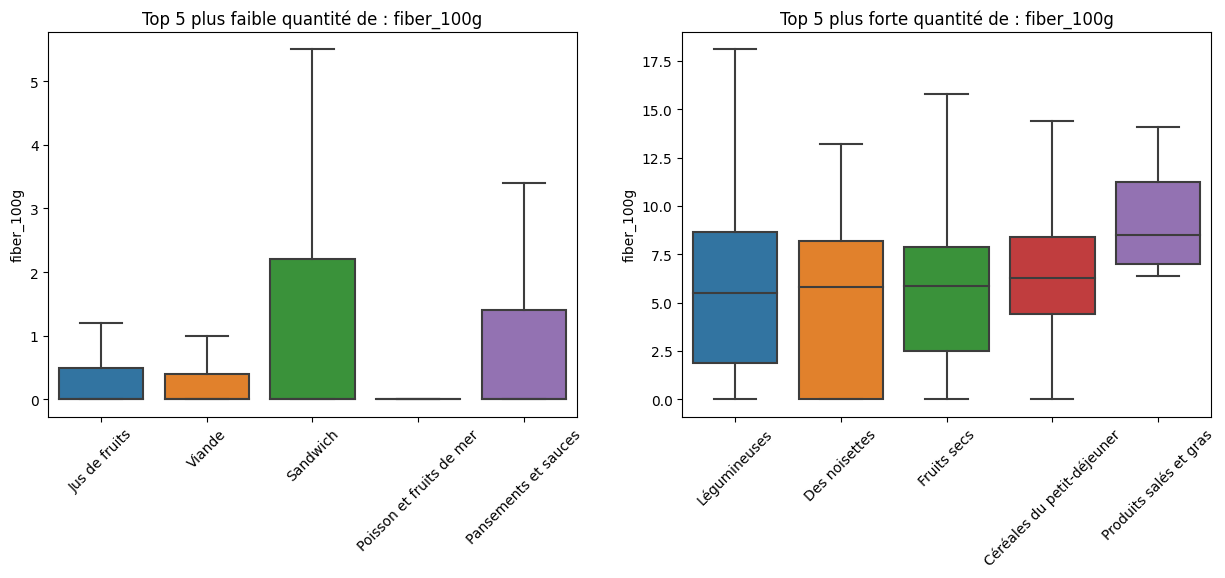

In [10]:
for colonne in colonnes:
    best = DataFinal.groupby('pnns_groups_2')[colonne].median().sort_values().index[:5]
    flop = DataFinal.groupby('pnns_groups_2')[colonne].median().sort_values().index[-5:]

    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(15,5))

    ax1 = plt.subplot(121)
    ax1 = sns.boxplot(DataFinal, y = colonne, x= 'pnns_groups_2', showfliers = False, order=best)
    plt.title('Top 5 plus faible quantité de : {}'.format(colonne))
    plt.xticks(rotation = 45)
    plt.xlabel('')

    ax2 = plt.subplot(122)
    ax2 = sns.boxplot(DataFinal, y=colonne, x= 'pnns_groups_2', showfliers = False, order=flop)
    plt.title('Top 5 plus forte quantité de : {}'.format(colonne))
    plt.xticks(rotation = 45)
    plt.xlabel('')

    plt.show()

# 4 : Analyse Multivariée

In [11]:
# Analyse en pairplot :
colonnes = ['pnns_groups_2', 'NGf', 'saturated-fat_100g', 'energy_100g',
      'sodium_100g', 'salt_100g', 'proteins_100g', 'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g']
#sns.pairplot(DataFinal[colonnes], hue= 'pnns_groups_2')
#plt.show()

- **Visuellement les groupes n'ont pas d'impact sur les ingrédients.**
- **Les variables salt et sodium sont corrélées.**
- **Il y a un petit qq chose entre les vairables sucres et carbohydrates et entre fat et saturated fat.**

In [12]:
#Analyse de la corrélation vs le nutrigrade fréquencisé : 
DataFinal[colonnes].select_dtypes(exclude = 'object').corr()['NGf'].sort_values(ascending = False)

NGf                   1.000000
saturated-fat_100g    0.507537
energy_100g           0.480634
fat_100g              0.464708
sugars_100g           0.401326
sodium_100g           0.184367
salt_100g             0.184366
carbohydrates_100g    0.137637
proteins_100g         0.040820
fiber_100g           -0.208878
Name: NGf, dtype: float64

- **Les colonnes fibres, le sel et les protéines ne semblent pas corrélées avec la colonne NGf alors qu'elles sont normalement prises dans le calcul de ces grades alimentaires.**
- **Il faut pousser l'analyse un peu plus loin.**

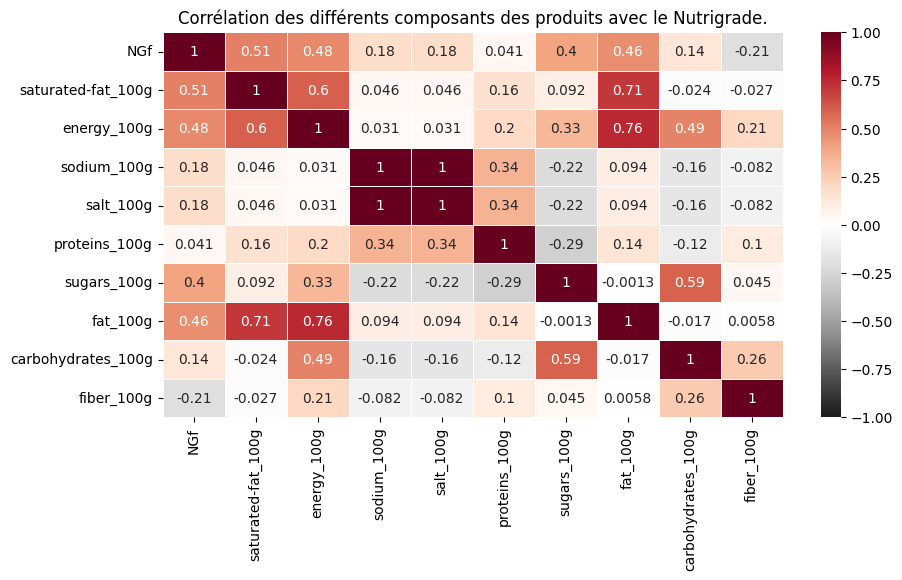

In [13]:
# Heatmap de corrélation :
plt.subplots(figsize=(10,5))
sns.heatmap(DataFinal[colonnes].select_dtypes(exclude=('object')).corr(), vmin = -1, vmax = 1, annot = True,linewidths=0.5, cmap = 'RdGy_r')
plt.title('Corrélation des différents composants des produits avec le Nutrigrade.')
plt.show()

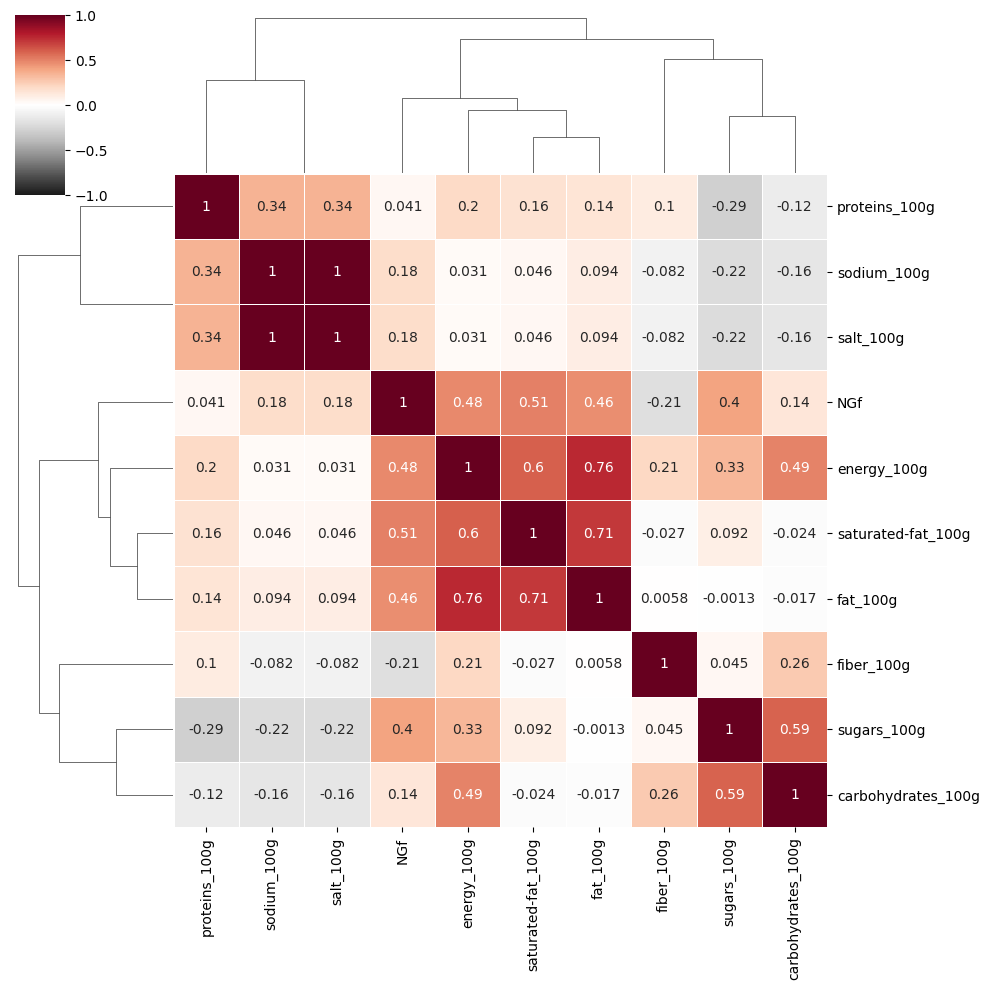

In [14]:
# Clustermap de corrélation :
sns.clustermap(DataFinal[colonnes].select_dtypes(exclude=('object')).corr(), vmin = -1, vmax = 1, annot = True,linewidths=0.5, cmap = 'RdGy_r')
plt.show()

- **En plus des corrélation avec le NGf, on observe une corrélation entre le gras saturé/gras et l'énergie, et entre le sucre et les carbohydrates (Glucides ou sucre) ainsi qu'entre le sel et le sodium.**
- **Corrélation plutot logique sel/sodium, une seule des deux colonnes sera utile, le cluster les prend même pour une seule variable.**

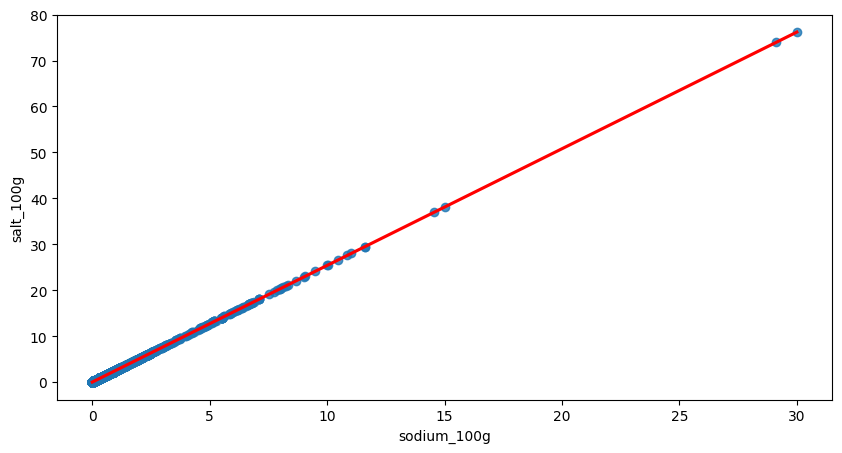

-1.142885096783175e-06 2.5400054930570626 1.0


In [15]:
# Etude corrélation entre le sel et le sodium :
plt.subplots(figsize = (10,5))
p = sns.regplot(DataFinal, x = 'sodium_100g', y = 'salt_100g', line_kws={"color": "red"})
plt.show()

slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(), y=p.get_lines()[0].get_ydata())

print(intercept, slope, r)

- **On a un R² de 1 on a donc une droite parfaite, les deux variable sont donc directement reliées.**
- **On retrouve le rapport 2.54.**

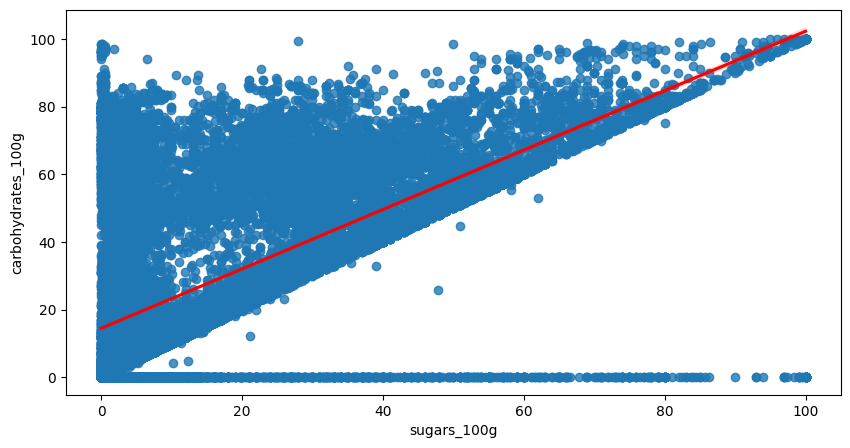

14.438831407688916 0.8782159043342543 0.9999999999999999


In [16]:
# Etude corrélation entre le sucre et les glucides :
plt.subplots(figsize = (10,5))
p = sns.regplot(DataFinal, x = 'sugars_100g', y = 'carbohydrates_100g', line_kws={"color": "red"})
plt.show()

slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(), y=p.get_lines()[0].get_ydata())
print(intercept, slope, r)

- **On observe une certaine corrélation entre ces deux variables.**

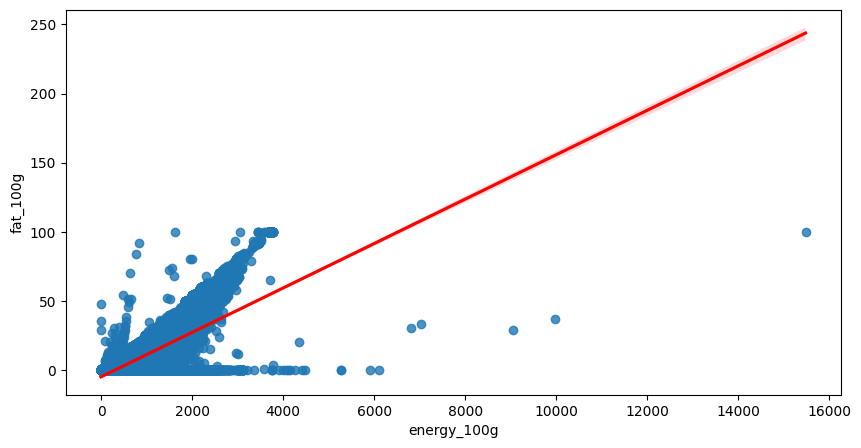

-5.021314474097451 0.016072415164441446 0.9999999999999994


In [17]:
# Etude corrélation entre l'energie et le reste :
# La colonne énergie peut être calculé comme suivant (mais différe entre les sites internet): 
#  E KJ = (37 x lipides) + (29 x alcool) + (17 x protéines) + (17 x glucides sauf polyols) + (13 x acides organiques) + (10 x polyols) + (8 x fibres)

plt.subplots(figsize = (10,5))
p = sns.regplot(DataFinal, x = 'energy_100g', y = 'fat_100g', line_kws={"color": "red"})
plt.show()

slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(), y=p.get_lines()[0].get_ydata())
print(intercept, slope, r)

- **On observe une belle corrélation entre le gras et l'energie.**

# 5 : Suppression des outliers 

In [18]:
# Recherche des outliers (def trouvée sur internet):
def find_outliers_IQR(df,alpha):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[df>(q3+alpha*IQR)]

    return outliers.index


GoodAlpha = 0
NewGoodAlpha = -1
Alpha = 0

colonnes = ['saturated-fat_100g', 'energy_100g', 'sodium_100g', 'salt_100g', 'proteins_100g', 'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g']
groupeProduit = list(DataFinal['pnns_groups_2'].unique())
Outliers = []


for colonne in colonnes:
    for GP in groupeProduit:
        for i in range (5,20,1) :
            Data = DataFinal[DataFinal['pnns_groups_2'] == GP]
            outliers = find_outliers_IQR(Data[colonne], i/5)
            NewGoodAlpha = round(len(outliers)/len(Data)*100,1)
            if GoodAlpha != NewGoodAlpha :
                GoodAlpha = NewGoodAlpha
            else :
                outliers = find_outliers_IQR(Data[colonne], i/5)
                for outlier in outliers:
                    Outliers.append(outlier)
                break 
    
len(list(set(Outliers)))

5716

In [19]:
# Recherche des outliers (def trouvée sur internet):
def find_outliers_IQR(df,alpha):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[df>(q3+alpha*IQR)]

    return outliers.index


GoodAlpha = 0
NewGoodAlpha = -1
Alpha = 0
NbStep = 0

colonnes = ['saturated-fat_100g', 'energy_100g', 'sodium_100g', 'salt_100g', 'proteins_100g', 'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g']
groupeProduit = list(DataFinal['pnns_groups_2'].unique())
Outliers = []


for colonne in colonnes:
    for GP in groupeProduit:
        for i in range (5,20,1) :
            Data = DataFinal[DataFinal['pnns_groups_2'] == GP]
            outliers = find_outliers_IQR(Data[colonne], i/5)
            NewGoodAlpha = round(len(outliers)/len(Data)*100,1)
            if GoodAlpha != NewGoodAlpha :
                GoodAlpha = NewGoodAlpha
            else :
                NbStep += 1
                if NbStep != 2:
                    continue
                else:
                    outliers = find_outliers_IQR(Data[colonne], i/5)
                    for outlier in outliers:
                        Outliers.append(outlier)
                    break
    
len(list(set(Outliers)))

133

- **5716 outliers avec la méthode 1.**
- **133 outliers avec la méthode 2.**
- **Mais ça reste une façon arbitraire au final...**

In [20]:
# Recherche des outliers (def trouvée sur internet):
def find_outliers_IQR(df,alpha):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[df>(q3+alpha*IQR)]

    return outliers.index

colonnes = ['saturated-fat_100g', 'energy_100g', 'sodium_100g', 'salt_100g', 'proteins_100g', 'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g']
groupeProduit = list(DataFinal['pnns_groups_2'].unique())

Outliers = []

for colonne in colonnes:
    for GP in groupeProduit:
        Data = DataFinal[DataFinal['pnns_groups_2'] == GP]
        outliers = find_outliers_IQR(Data[colonne], 1.5)
        for outlier in outliers:
            Outliers.append(outlier)
    
len(list(set(Outliers)))

10480

- **Cette méthode par colonne et par groupe de produit supprime beaucoup trop d'outliers.**

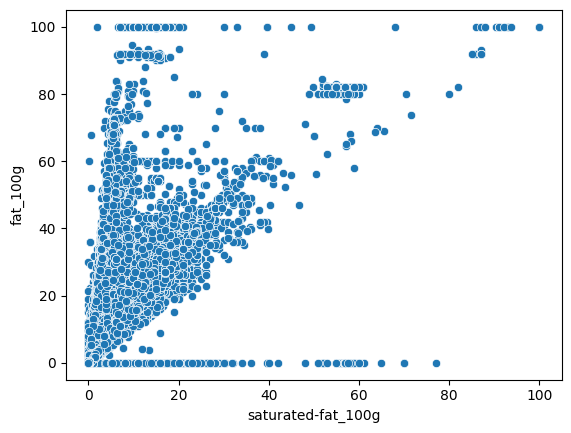

In [21]:
# Recherche manuelle des outliers par variable ou groupe de variable :

# Gras Saturé / Gras : 
sns.scatterplot(x = DataFinal['saturated-fat_100g'], y = DataFinal['fat_100g'])
plt.show()

- **Visuellement on n'observe pas d'outlier sur la totalité des produits.**

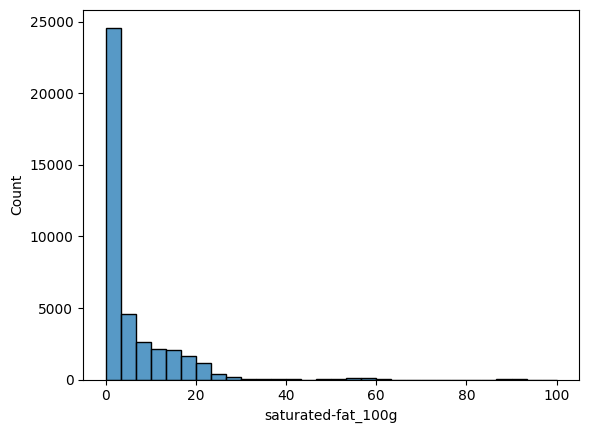

In [22]:
# Test de répartition des valeurs:
sns.histplot(DataFinal['saturated-fat_100g'], bins = 30)
plt.show()

- **Ce n'est pas une distribution gaussienne, beaucoup de 0 et quelques outliers.**

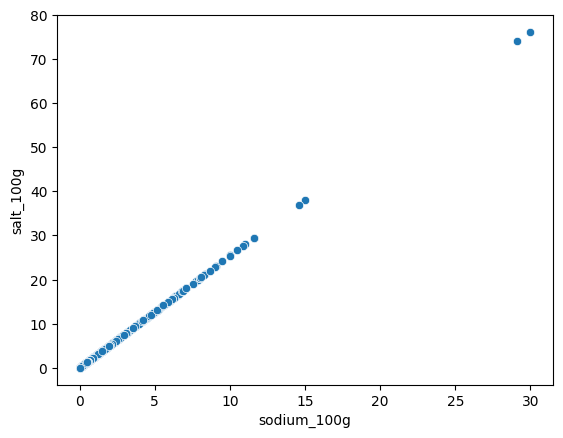

31053    Poisson pané
32203    Allure Mango
Name: product_name, dtype: object


In [23]:
# Sodium / Sel : 
sns.scatterplot(x = DataFinal['sodium_100g'], y = DataFinal['salt_100g'])
plt.show()

# Produit 
print(DataFinal[DataFinal['salt_100g'] > 50]['product_name'])

- **Il y a un produit fortement salé.**
- **Il s'agit de biscuit bio, valeur probablement abérrante sinon le biscuit serait super sucré même en présence de soja.**

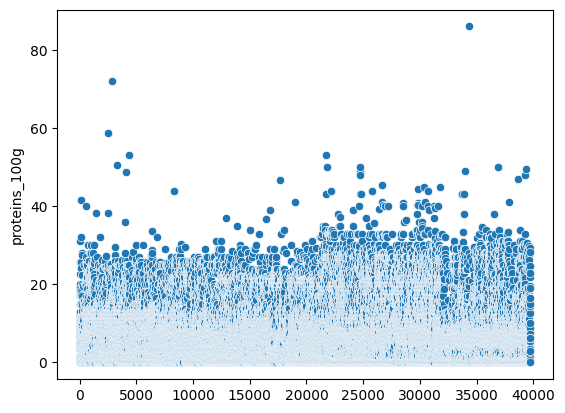

['Chewing-gum menthe verte' 'Sirop Fraise']


In [24]:
# Proteine : 
sns.scatterplot(DataFinal['proteins_100g'])
plt.show()

# Produits 
print(DataFinal[DataFinal['proteins_100g'] > 70]['product_name'].values)

# Elimination de ce produit : 
DataFinal = DataFinal[DataFinal['proteins_100g'] < 70]

- **Les deux produits les plus haut sont un Chewing-gum et un sirop ou normalement il n'y a pas ou peu de protéines.**

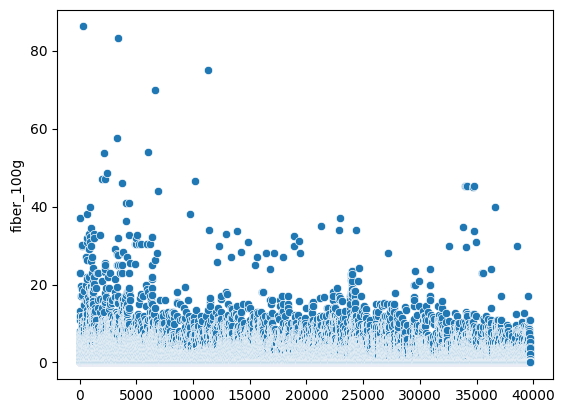

code  \
284    3760020501518   
3354   5411788045759   
6681   3256220666398   
11349  3179142785100   

                                                                                           url  \
284                  http://world-fr.openfoodfacts.org/produit/3760020501518/agar-agar-karelea   
3354                    http://world-fr.openfoodfacts.org/produit/5411788045759/agar-agar-lima   
6681   http://world-fr.openfoodfacts.org/produit/3256220666398/champignons-noirs-deshydrates-u   
11349                 http://world-fr.openfoodfacts.org/produit/3179142785100/agar-agar-vahine   

                        product_name         brands_tags  \
284                        Agar-agar  karelea,lea-nature   
3354                       Agar-Agar                lima   
6681   Champignons noirs déshydratés                   u   
11349                      Agar-Agar              vahine   

                                              ingredients_text  \
284                                 agar-agar (Gracilaria sp.)   
3354                                                Agar-Agar.   
6681   Champignons noirs déshydratés (Auricularia polytricha).   
11349                                               Agar-agar    

            allergens       traces_fr nutrition_grade_fr  \
284    Non Communiqué  Non Communiqué                  a   
3354   Non Communiqué  Non Communiqué                  a   
6681   Non Communiqué  Non Communiqué                  a   
11349  Non Communiqué  Non Communiqué                  b   

                  pnns_groups_2    main_category_fr  \
284    Poisson et fruits de mer  Produits de la mer   
3354   Poisson et fruits de mer  Produits de la mer   
6681                    Légumes         Champignons   
11349  Poisson et fruits de mer  Produits de la mer   

                                                                     image_small_url  \
284     http://fr.openfoodfacts.org/images/products/376/002/050/1518/front.3.200.jpg   
3354                                                                  Non Communiqué   
6681    http://fr.openfoodfacts.org/images/products/325/622/066/6398/front.8.200.jpg   
11349  http://fr.openfoodfacts.org/images/products/317/914/278/5100/front.19.200.jpg   

       NGf  saturated-fat_100g  energy_100g  sodium_100g  salt_100g  \
284      0                 0.0        177.0     0.015000     0.0381   
3354     0                 0.0        759.0     0.031496     0.0800   
6681     0                 0.0        746.0     0.039370     0.1000   
11349    1                 0.0        771.0     0.279528     0.7100   

       proteins_100g  sugars_100g  fat_100g  carbohydrates_100g  fiber_100g  \
284              0.6          0.0       0.0                 0.5        86.2   
3354             1.0          0.0       0.1                 4.2        83.3   
6681             6.5          0.0       0.8                 0.0        70.0   
11349            0.0          5.0       0.0                 5.0        75.0   

       OriginesIngredients  Production  LabelsBio  HuileDePalme  Packaging  \
284                    0.3         0.3          0           1.0        1.0   
3354                   0.3         0.3          1           1.0        1.0   
6681                   0.0         0.3          0           1.0        0.0   
11349                  0.3         1.0          0           1.0        1.0   

       NbAdditifs  
284           1.0  
3354          1.0  
6681          1.0  
11349         1.0

In [25]:
# Fibres : 
sns.scatterplot(DataFinal['fiber_100g'])
plt.show()

# Produits :  
DataFinal[DataFinal['fiber_100g'] > 60]

- **Les 4 produits les plus haut sont des produits nomaux avec 100% ou presque de fibres (agar agar et champignons) donc valeures non abérantes.**

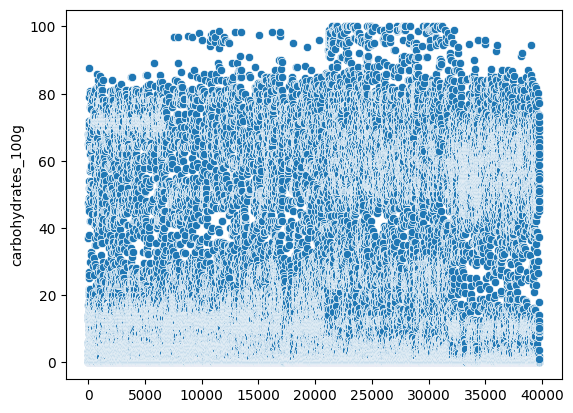

In [26]:
# Carbohydrates : 
sns.scatterplot(DataFinal['carbohydrates_100g'])
plt.show()

- **Il ne semble pas y avoir d'outliers sur la totalité des produits.**

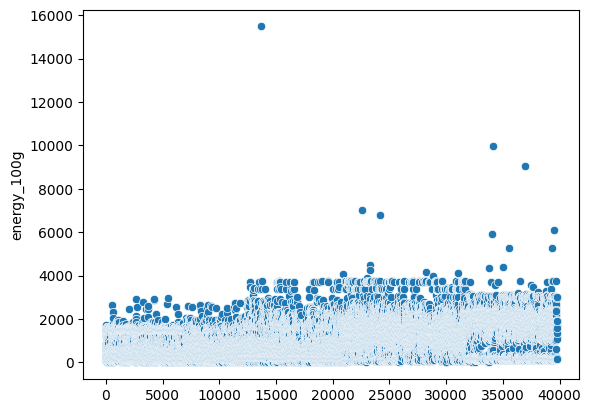

In [27]:
# Energie : 
sns.scatterplot(DataFinal['energy_100g'])
plt.show()

# Produits :
DataFinal[DataFinal['energy_100g'] > 5000]

# Produits :  
DataFinal = DataFinal[DataFinal['energy_100g'] < 5000]

- **L'huile de colza ayant une energy à 15481 est noté à 3766 sur le site internet c'est une erreure de remplissage.**
- **Idem pour les autres produits...**
- **Colonne fausse ou produits faux???**

In [28]:
# Etude aléatoire de différents produits pour voir manuellement sur le site si cette colonne est bonne ou non :
code = random.choice(DataFinal['code'])
print(code)
DataFinal[DataFinal['code'] == code]['energy_100g']

3564700627655


14067    765.0
Name: energy_100g, dtype: float64

- **Aprés une dizaine de test (sur 40000 produits) les résultats ne sont pas toujours bons mais moins abérrant.**
- **Suppression des lignes au dessu de 5000 en Energy.**

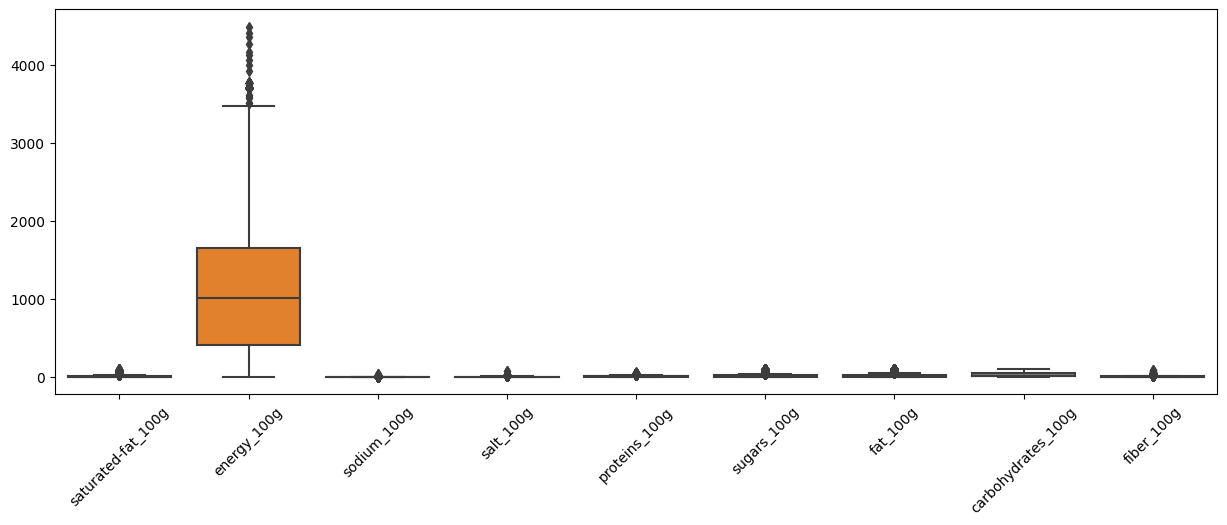

In [29]:
# Outliers :
plt.subplots(figsize = (15,5))
sns.boxplot(DataFinal[colonnes])
plt.xticks(rotation = 45)
plt.show()

- **Il reste des outliers dans la varibale Energy, mais cette variable est elle trés fiable et utile?**

In [30]:
# Ajout de l'étape
Etape13 = ['Etape 13', "Suppression manulle des Outliers", DataFinal.shape[1], DataFinal.shape[0], round((DataFinal.isna().sum().sum())*100/(DataFinal.shape[0]*DataFinal.shape[1]))]
Etape13 = pd.DataFrame([Etape13], columns = ['Etapes', 'Action', 'NbColonne', 'NbLigne', 'PourcentageNaN'])
DfNettoyage = pd.concat([DfNettoyage, Etape13])

# 6 : Prédiction du Nutriscore

## 6.1 : Etude du PCA et des variables utiles

In [31]:
# Création des variables:
X = DataFinal[['saturated-fat_100g', 'energy_100g', 'sodium_100g', 'salt_100g', 'proteins_100g', 'sugars_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g']]
y = DataFinal['NGf']

In [32]:
# Standardisation des données : 
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaler2.fit(X)
X_scaled = scaler2.transform(X)
X_scaled.shape

(39741, 9)

In [33]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7    8
mean  0.0 -0.0  0.0  0.0  0.0  0.0  0.0 -0.0 -0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [34]:
# Garder les variables les plus impactantes :
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.8)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(39741, 4)

- **Il ne reste plus que 4 variables synthétisées pour expliquer 80% de la variance.**

In [35]:
pca.explained_variance_ratio_

array([0.28761902, 0.27874383, 0.15595483, 0.12027527])

- **La 4éme n'est pas vraiment utile.**

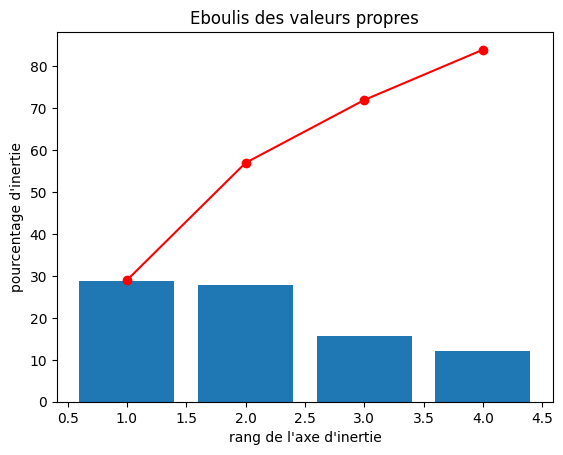

In [36]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, 5)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

- **L'éboulis montre une pertinance a garder les 2 premiers plans.**

In [37]:
features = X.columns
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

saturated-fat_100g  energy_100g  sodium_100g  salt_100g  proteins_100g  \
F1                0.49         0.58         0.13       0.13           0.19   
F2                0.01        -0.14         0.53       0.53           0.33   
F3               -0.35         0.06         0.36       0.36           0.06   
F4                0.09        -0.03         0.20       0.20          -0.46   

    sugars_100g  fat_100g  carbohydrates_100g  fiber_100g  
F1         0.16      0.53                0.21        0.11  
F2        -0.40      0.04               -0.36       -0.13  
F3         0.35     -0.33                0.53        0.31  
F4         0.38      0.04                0.04       -0.74

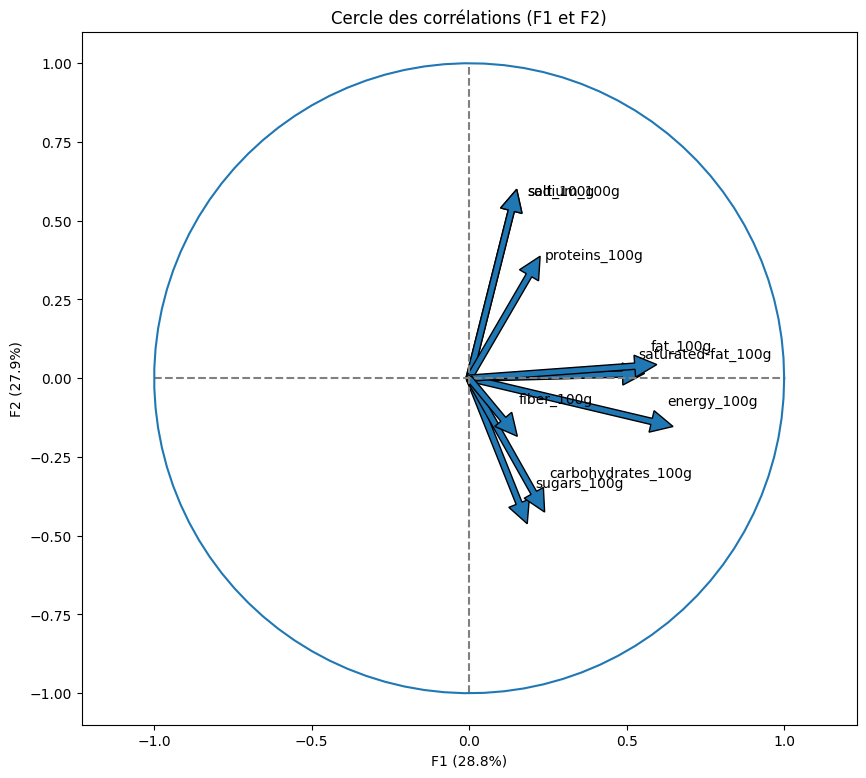

In [38]:
x, y = 0,1

fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

- **Les variables sel et sodium sont corrélées.**
- **Les variables gras et gras saturé sont corrélées.**
- **Les variables sucres et carbohydrates sont corrélées.**

In [39]:
# Suppression des variables en trop :
DataFinal = DataFinal.drop(columns=['sodium_100g', 'fat_100g', 'carbohydrates_100g', 'energy_100g'])

In [40]:
# Ajout de l'étape
Etape14 = ['Etape Final', "Suppression des variables inutiles ou en doubles", DataFinal.shape[1], DataFinal.shape[0], round((DataFinal.isna().sum().sum())*100/(DataFinal.shape[0]*DataFinal.shape[1]))]
Etape14 = pd.DataFrame([Etape14], columns = ['Etapes', 'Action', 'NbColonne', 'NbLigne', 'PourcentageNaN'])
DfNettoyage = pd.concat([DfNettoyage, Etape14])

In [41]:
DfNettoyage

Etapes  \
0       Etape 1   
1       Etape 2   
2       Etape 3   
3       Etape 4   
4       Etape 5   
5       Etape 6   
6       Etape 7   
7       Etape 8   
8       Etape 9   
9      Etape 10   
10     Etape 11   
0      Etape 12   
0      Etape 13   
0   Etape Final   

                                                                                                  Action  \
0                                                                                   Ouverture du Fichier   
1                                                                         Suppression des colonnes vides   
2                                                                           Suppression des lignes vides   
3                                                                     Etude des Variables Info Générales   
4                                      Etude des Variables Tags + Centrage sur produits vendus en France   
5                                                                        Etude des Variables Ingrédients   
6                                                                   Etude des Variables Données Diverses   
7                                                                 Etude des Variables Données Nutritives   
8                          Remplissage des Colonnes Textes + Suppression des produits sans groupes PNNS2   
9   Création des variables pour l'EnvironnementScore + Recentrage sur les variables utiles au Nutriscore   
10                                                          Remplissage des colonnes quantitatives par 0   
0                                Suppression des valeurs abérrantes (négatives, +100 et somme sup à 100)   
0                                                                       Suppression manulle des Outliers   
0                                                       Suppression des variables inutiles ou en doubles   

    NbColonne  NbLigne  PourcentageNaN  
0         162   320772              76  
1         146   320772              74  
2         146   265302              71  
3         139   261822              74  
4         121    66822              75  
5         118    66822              75  
6         106    66822              79  
7          97    66820              78  
8          91    40003              70  
9          27    40003               2  
10         27    40003               0  
0          27    39752               0  
0          27    39741               0  
0          23    39741               0

## 6.2 : Prediction du Nutrigrade via les KNN

### 6.2.1 : Prédiction via les variables nutritives

In [42]:
# Création des variables:
X = DataFinal[['saturated-fat_100g', 'salt_100g', 'proteins_100g', 'sugars_100g', 'fiber_100g']]
y = DataFinal['NGf']

In [43]:
# Standardisation des données : 
from sklearn.preprocessing import StandardScaler
scaler3 = StandardScaler()
scaler3.fit(X)
X_scaled = scaler3.transform(X)
X_scaled.shape

(39741, 5)

In [44]:
# Création d'un groupe test et train pour vérifier si le model est bon :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.75, random_state= 42)

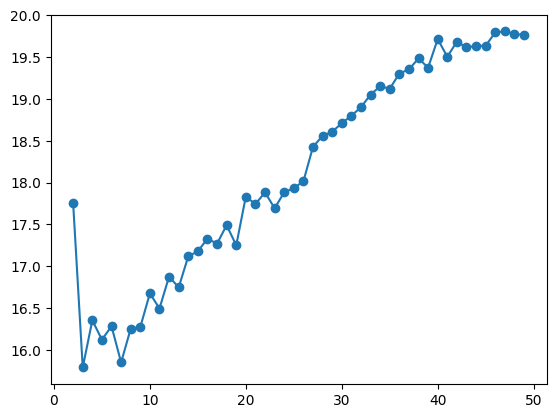

In [45]:
from sklearn import neighbors
errors = []
for k in range(2,50):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.plot(range(2,50), errors, 'o-')
plt.show()

In [46]:
# Test N°1 : KNeighborsClassifier (2x car plus rapide que le Greadsearch)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
dico = {'n_neighbors' : range(2,100), #Tous les voisins entre 2 et 100
        'weights' : ['uniform', 'distance']}
rando = RandomizedSearchCV(KNeighborsClassifier(), dico , n_iter=30).fit(X_train,y_train)

n_neighbors = rando.best_params_['n_neighbors']

dico = {'n_neighbors' : range(2,n_neighbors +5),
        'weights' : ['uniform', 'distance']}
rando = RandomizedSearchCV(KNeighborsClassifier(), dico , n_iter= n_neighbors+3).fit(X_train,y_train)

In [47]:
print("Les meilleurs paramètres sont : ", rando.best_params_)
print("Le meilleur score est : ", rando.best_score_)

Les meilleurs paramètres sont :  {'weights': 'distance', 'n_neighbors': 9}
Le meilleur score est :  0.8526757255494045


In [48]:
# Model KNN avec le groupe d'entrainement et les variables optimales: 
modelKNN = KNeighborsClassifier(weights = 'distance', n_neighbors = rando.best_params_['n_neighbors']).fit(X_train, y_train)

In [49]:
print("Le accuracy score pour le jeu d'entrainement sur le model KNN est de :", modelKNN.score(X_train, y_train))
print("Le accuracy score pour le jeu de test sur le model KNN est de :", modelKNN.score(X_test, y_test))
# Scores plutot bon (leger overfighting).

Le accuracy score pour le jeu d'entrainement sur le model KNN est de : 0.9923167253816474
Le accuracy score pour le jeu de test sur le model KNN est de : 0.855877616747182


In [50]:
DataFinal['PredictKNN'] = modelKNN.predict(X_scaled)
round(len(DataFinal[DataFinal['NGf'] != DataFinal['PredictKNN']])/len(DataFinal)*100, 3)

4.18

- **96% de bonne prédiction avec ce jeu d'entrainement.**

### 6.2.2 : Prédiction sur un produit test avec le KNN simple

In [51]:
# Création d'un produit test simple par moyenne des colonnes :
test = X.mean().to_frame().T
test = scaler3.transform(test)

In [52]:
modelKNN.predict(test)[0]

3

- **Prediction nutriscore = 3 soit nutrigrade = d.**

In [53]:
# Présentation du meilleur substitut :
voisins = modelKNN.kneighbors(test)

df = pd.DataFrame()

for v in voisins[1][0]:
    df = pd.concat([df, DataFinal.loc[v].to_frame().T])
    
df.sort_values('NGf').head(1)

code  \
1083  3580282816607   

                                                                                           url  \
1083  http://world-fr.openfoodfacts.org/produit/3580282816607/champignons-noirs-seches-chao-an   

                  product_name brands_tags  \
1083  Champignons noirs séchés     chao-an   

                                           ingredients_text       allergens  \
1083  Champignons noirs séchés entiers (Auricularia judae).  Non Communiqué   

           traces_fr nutrition_grade_fr pnns_groups_2  \
1083  Non Communiqué                  a       Légumes   

                             main_category_fr image_small_url NGf  \
1083  Aliments et boissons à base de végétaux  Non Communiqué   0   

     saturated-fat_100g salt_100g proteins_100g sugars_100g fiber_100g  \
1083                0.0       0.0           9.0         0.0       11.0   

     OriginesIngredients Production LabelsBio HuileDePalme Packaging  \
1083                 0.0        0.3         0          1.0       0.0   

     NbAdditifs PredictKNN  
1083        1.0          0

- **A ce stade il faut lui rentrer le paramétre pnns de groupe 2 pour être plus précis (dummisation du paramétre PNNS2)**

### 6.2.3 : Prédiction via les variables nutritives + la catégorie de produit

In [54]:
# Dummisation des groupes pour amélioration des scores :
DataFinal.head(2)
DataFinal = pd.concat([DataFinal, DataFinal['pnns_groups_2'].str.get_dummies()], axis=1)

In [55]:
# Nouveaux paramètres : 
X = DataFinal[['saturated-fat_100g', 'salt_100g', 'proteins_100g', 'sugars_100g', 'fiber_100g',  'Apéritifs',
       'Biscuits et gâteaux', 'Boissons alcoolisées', 'Boissons non sucrées','Boissons sucrées', 'Boissons sucrées artificiellement', 'Bonbons',
       'Céréales', 'Céréales du petit-déjeuner', 'Des noisettes', 'Desserts laitiers', 'Fromage', 'Fruits', 'Fruits secs', 'Glace',
       'Graisses', 'Jus de fruits', 'Lait et yaourt', 'Légumes', 'Légumineuses', 'Nectars des fruits', 'Pain', 'Pansements et sauces',
       'Patates', 'Pizzas et quiche', 'Plats de tripes', 'Poisson et fruits de mer', 'Produits au chocolat',
       'Produits salés et gras', 'Sandwich', 'Soupes', 'Un plat de repas', 'Viande', 'Viande transformée','Œufs']]
y = DataFinal['NGf']

In [56]:
# KNN : 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state= 42)

dico = {'n_neighbors' : range(2,100), #Tous les voisins entre 2 et 100
        'weights' : ['uniform', 'distance']}
rando = RandomizedSearchCV(KNeighborsClassifier(), dico , n_iter=15).fit(X_train,y_train)
n_neighbors = rando.best_params_['n_neighbors']
dico = {'n_neighbors' : range(2,n_neighbors +5),
        'weights' : ['uniform', 'distance']}
rando = RandomizedSearchCV(KNeighborsClassifier(), dico , n_iter= n_neighbors+3).fit(X_train,y_train)

print("Les meilleurs paramètres sont : ", rando.best_params_)
print("Le meilleur score est : ", rando.best_score_)

modelKNN = KNeighborsClassifier(weights = 'distance', n_neighbors = rando.best_params_['n_neighbors']).fit(X_train, y_train)

print("Le accuracy score pour le jeu d'entrainement sur le model KNN est de :", modelKNN.score(X_train, y_train))
print("Le accuracy score pour le jeu de test sur le model KNN est de :", modelKNN.score(X_test, y_test))

DataFinal['PredictKNN'] = modelKNN.predict(X)
round(len(DataFinal[DataFinal['NGf'] != DataFinal['PredictKNN']])/len(DataFinal)*100,3)

Les meilleurs paramètres sont :  {'weights': 'distance', 'n_neighbors': 7}
Le meilleur score est :  0.8541184365039424
Le accuracy score pour le jeu d'entrainement sur le model KNN est de : 0.9974500922663982
Le accuracy score pour le jeu de test sur le model KNN est de : 0.8579911433172303


3.742

- **Légére amélioration du % de bonne prédiction.**

### 6.2.4 : Prédiction sur un produit plus complexe

In [57]:
# Création d'un nouveau produit plus complexe avec des données aléatoire :
Test2 = DataFinal[['saturated-fat_100g','salt_100g', 'proteins_100g', 'sugars_100g', 'fiber_100g']]
Test3 = DataFinal[['Apéritifs', 'Biscuits et gâteaux', 'Boissons alcoolisées',
       'Boissons non sucrées', 'Boissons sucrées',
       'Boissons sucrées artificiellement', 'Bonbons', 'Céréales',
       'Céréales du petit-déjeuner', 'Des noisettes', 'Desserts laitiers',
       'Fromage', 'Fruits', 'Fruits secs', 'Glace', 'Graisses',
       'Jus de fruits', 'Lait et yaourt', 'Légumes', 'Légumineuses',
       'Nectars des fruits', 'Pain', 'Pansements et sauces', 'Patates',
       'Pizzas et quiche', 'Plats de tripes', 'Poisson et fruits de mer',
       'Produits au chocolat', 'Produits salés et gras', 'Sandwich', 'Soupes',
       'Un plat de repas', 'Viande', 'Viande transformée', 'Œufs']]


df = pd.DataFrame(index=range(1, 2))

for colonne in Test2.columns:
    df[colonne] = random.choice(list(Test2[colonne]))

Test3 = list(Test3.columns)
Cat = random.choice(Test3)
print(Cat)
df[Cat] = 1
Test3.remove(Cat)

for Categorie in Test3:
    df[Categorie] = 0

df

Produits au chocolat


saturated-fat_100g  salt_100g  proteins_100g  sugars_100g  fiber_100g  \
1                 0.5      0.028           20.0          1.7         0.0   

   Produits au chocolat  Apéritifs  Biscuits et gâteaux  Boissons alcoolisées  \
1                     1          0                    0                     0   

   Boissons non sucrées  Boissons sucrées  Boissons sucrées artificiellement  \
1                     0                 0                                  0   

   Bonbons  Céréales  Céréales du petit-déjeuner  Des noisettes  \
1        0         0                           0              0   

   Desserts laitiers  Fromage  Fruits  Fruits secs  Glace  Graisses  \
1                  0        0       0            0      0         0   

   Jus de fruits  Lait et yaourt  Légumes  Légumineuses  Nectars des fruits  \
1              0               0        0             0                   0   

   Pain  Pansements et sauces  Patates  Pizzas et quiche  Plats de tripes  \
1     0                     0        0                 0                0   

   Poisson et fruits de mer  Produits salés et gras  Sandwich  Soupes  \
1                         0                       0         0       0   

   Un plat de repas  Viande  Viande transformée  Œufs  
1                 0       0                   0     0

In [58]:
# Réorganisation des colonnes : 
df = df[['saturated-fat_100g', 'salt_100g', 'proteins_100g', 'sugars_100g', 'fiber_100g', 'Apéritifs',
       'Biscuits et gâteaux', 'Boissons alcoolisées', 'Boissons non sucrées','Boissons sucrées', 'Boissons sucrées artificiellement', 'Bonbons',
       'Céréales', 'Céréales du petit-déjeuner', 'Des noisettes', 'Desserts laitiers', 'Fromage', 'Fruits', 'Fruits secs', 'Glace',
       'Graisses', 'Jus de fruits', 'Lait et yaourt', 'Légumes', 'Légumineuses', 'Nectars des fruits', 'Pain', 'Pansements et sauces',
       'Patates', 'Pizzas et quiche', 'Plats de tripes', 'Poisson et fruits de mer', 'Produits au chocolat',
       'Produits salés et gras', 'Sandwich', 'Soupes', 'Un plat de repas', 'Viande', 'Viande transformée', 'Œufs']]

In [59]:
modelKNN.predict(df)[0]

1

In [60]:
# Présentation du meilleur substitut :
voisins = modelKNN.kneighbors(df)

df1 = pd.DataFrame()

for v in voisins[1][0]:
    df1 = pd.concat([df1, DataFinal.loc[v].to_frame().T])
    
df1.sort_values('NGf').head(1)

code  \
2636  3271514170306   

                                                                                                                      url  \
2636  http://world-fr.openfoodfacts.org/produit/3271514170306/courgettes-a-la-provencale-cuisinees-au-basilic-jean-martin   

                                         product_name  brands_tags  \
2636  Courgettes à la provençale cuisinées au basilic  jean-martin   

                                                                                                                                 ingredients_text  \
2636  Courgettes (52%), tomates (32%), concentré de tomate (6%), huile de tournesol, basilic (1,2%), sel, huile d'olive vierge extra, sucre, ail.   

           allergens       traces_fr nutrition_grade_fr     pnns_groups_2  \
2636  Non Communiqué  Non Communiqué                  a  Un plat de repas   

     main_category_fr  \
2636    Légumes frais   

                                                                   image_small_url  \
2636  http://fr.openfoodfacts.org/images/products/327/151/417/0306/front.5.200.jpg   

     NGf saturated-fat_100g salt_100g proteins_100g sugars_100g fiber_100g  \
2636   0                0.5      0.45           1.6         3.9        0.0   

     OriginesIngredients Production LabelsBio HuileDePalme Packaging  \
2636                 0.3        1.0         0          1.0       1.0   

     NbAdditifs PredictKNN Apéritifs Biscuits et gâteaux Boissons alcoolisées  \
2636        1.0          0         0                   0                    0   

     Boissons non sucrées Boissons sucrées Boissons sucrées artificiellement  \
2636                    0                0                                 0   

     Bonbons Céréales Céréales du petit-déjeuner Des noisettes  \
2636       0        0                          0             0   

     Des pâtisseries Desserts laitiers Fromage Fruits Fruits secs Glace  \
2636               0                 0       0      0           0     0   

     Graisses Jus de fruits Lait et yaourt Légumes Légumineuses  \
2636        0             0              0       0            0   

     Nectars des fruits Pain Pansements et sauces Patates Pizzas et quiche  \
2636                  0    0                    0       0                0   

     Plats de tripes Poisson et fruits de mer Produits au chocolat  \
2636               0                        0                    0   

     Produits salés et gras Sandwich Soupes Un plat de repas Viande  \
2636                      0        0      0                1      0   

     Viande transformée Œufs  
2636                  0    0

- **Ne donne pas le bon groupe de produit.**

In [61]:
# Donne il des produits dans la bonne catégorie?
voisins = modelKNN.kneighbors(df)

df1 = pd.DataFrame()

for v in voisins[1][0]:
    df1 = pd.concat([df1, DataFinal.loc[v].to_frame().T])
    
df1[df1['pnns_groups_2'] == Cat]

Empty DataFrame
Columns: [code, url, product_name, brands_tags, ingredients_text, allergens, traces_fr, nutrition_grade_fr, pnns_groups_2, main_category_fr, image_small_url, NGf, saturated-fat_100g, salt_100g, proteins_100g, sugars_100g, fiber_100g, OriginesIngredients, Production, LabelsBio, HuileDePalme, Packaging, NbAdditifs, PredictKNN, Apéritifs, Biscuits et gâteaux, Boissons alcoolisées, Boissons non sucrées, Boissons sucrées, Boissons sucrées artificiellement, Bonbons, Céréales, Céréales du petit-déjeuner, Des noisettes, Des pâtisseries, Desserts laitiers, Fromage, Fruits, Fruits secs, Glace, Graisses, Jus de fruits, Lait et yaourt, Légumes, Légumineuses, Nectars des fruits, Pain, Pansements et sauces, Patates, Pizzas et quiche, Plats de tripes, Poisson et fruits de mer, Produits au chocolat, Produits salés et gras, Sandwich, Soupes, Un plat de repas, Viande, Viande transformée, Œufs]
Index: []

- **Lors du test il ne donnait pas de produit dans la bonne catégorie en utilisant les KNN.**

## 6.3 : Prediction du Nutrigrade via les KMeans

In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [63]:
# Création des variables:
X = DataFinal[['saturated-fat_100g', 'salt_100g', 'proteins_100g', 'sugars_100g', 'fiber_100g']]
y = DataFinal['NGf']

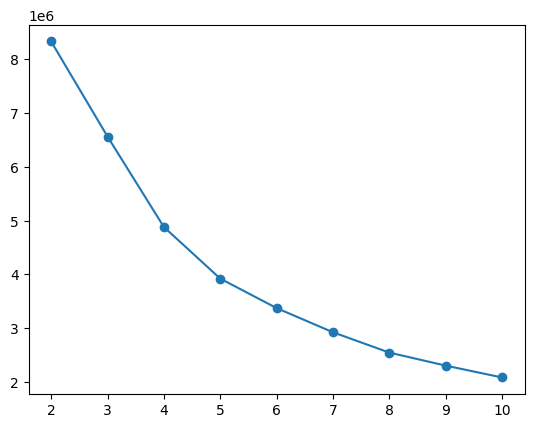

In [64]:
inertie = []
for k in range (2,11):
    model = KMeans(n_clusters=k, n_init = 10)
    model.fit(X)
    inertie.append(model.inertia_)
    
cluster = [2,3,4,5,6,7,8,9,10]
plt.plot(cluster, inertie, marker='o')
plt.show()

- **La cassure semble être à 4 clusters.**

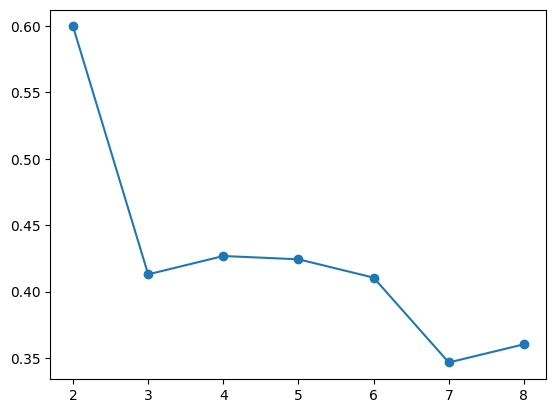

In [65]:
silhouette = []
for k in range(2,9):
    model = KMeans(n_clusters=k, random_state=3, n_init = 10)
    model.fit(X)
    silhouette.append(silhouette_score(X, model.labels_))
    
cluster = [2,3,4,5,6,7,8]
plt.plot(cluster, silhouette, marker='o')
plt.show()

- **Le nombre de cluster optimal via le silouhette score est à 2.**

In [66]:
model = KMeans(n_clusters=5, n_init = 10)
clusters = model.fit_predict(X)
DataFinal['KMeans'] = clusters

In [67]:
model.cluster_centers_

array([[ 6.56899079,  0.19992692,  3.69895972, 60.75256191,  1.42115225],
       [ 2.11667859,  0.73275452,  4.46735016,  5.15281505,  1.51349598],
       [52.71901566,  0.78491294,  2.2503132 ,  2.03051454,  0.97315436],
       [ 7.80717525,  1.72259871, 19.27459018,  1.3953999 ,  1.39960358],
       [ 9.55894159,  0.53128291,  5.96661757, 30.07706619,  2.8227034 ]])

In [68]:
round(len(DataFinal[DataFinal['NGf'] != DataFinal['KMeans']])/len(DataFinal)*100)

73

- **74% de mauvaises réponses.**
- **Ce test avec ces paramètres ne permet pas une bonne prédiction.**
- **On a 5 groupes mais il trouve 2 à 4 clusters.**

## 6.4 : Prediction du Nutrigrade via le DT

### 6.4.1 : Prédiction via les ingrédients

In [69]:
# Création des variables:
X = DataFinal[['saturated-fat_100g', 'salt_100g', 'proteins_100g', 'sugars_100g', 'fiber_100g']]
y = DataFinal['NGf']

In [70]:
# Standardisation des données : 
from sklearn.preprocessing import StandardScaler
scaler4 = StandardScaler()
scaler4.fit(X)
X_scaled = scaler4.transform(X)
X_scaled.shape

(39741, 5)

In [71]:
# Création d'un groupe test et train pour vérifier si le model est bon :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.75, random_state= 42)

In [72]:
from sklearn.tree import DecisionTreeClassifier
dico = {'max_depth' : range(2,20)}
rando = RandomizedSearchCV(DecisionTreeClassifier(), dico , n_iter=15).fit(X_train,y_train)
print("Les meilleurs paramètres sont : ", rando.best_params_)
print("Le meilleur score est : ", rando.best_score_)

Les meilleurs paramètres sont :  {'max_depth': 16}
Le meilleur score est :  0.8357658111055193


In [73]:
modelDT = DecisionTreeClassifier(max_depth = rando.best_params_['max_depth']).fit(X_train, y_train)
print("Le accuracy score pour le jeu d'entrainement sur le model DT est de :", modelDT.score(X_train, y_train))
print("Le accuracy score pour le jeu de test sur le model DT est de :", modelDT.score(X_test, y_test))

Le accuracy score pour le jeu d'entrainement sur le model DT est de : 0.9573561482972656
Le accuracy score pour le jeu de test sur le model DT est de : 0.8436996779388084


In [74]:
DataFinal['DT'] = modelDT.predict(X_scaled)
round(len(DataFinal[DataFinal['NGf'] != DataFinal['DT']])/len(DataFinal)*100)

7

- **6 à 8% de mauvaises réponses.**
- **C'est moins bon que le KNN.**

### 6.4.2 : Prédiction via les ingrédients et les groupes produits

In [75]:
# Nouveaux paramètres : 
X = DataFinal[['saturated-fat_100g', 'salt_100g', 'proteins_100g', 'sugars_100g', 'fiber_100g', 'Apéritifs',
       'Biscuits et gâteaux', 'Boissons alcoolisées', 'Boissons non sucrées','Boissons sucrées', 'Boissons sucrées artificiellement', 'Bonbons',
       'Céréales', 'Céréales du petit-déjeuner', 'Des noisettes', 'Desserts laitiers', 'Fromage', 'Fruits', 'Fruits secs', 'Glace',
       'Graisses', 'Jus de fruits', 'Lait et yaourt', 'Légumes', 'Légumineuses', 'Nectars des fruits', 'Pain', 'Pansements et sauces',
       'Patates', 'Pizzas et quiche', 'Plats de tripes', 'Poisson et fruits de mer', 'Produits au chocolat',
       'Produits salés et gras', 'Sandwich', 'Soupes', 'Un plat de repas', 'Viande', 'Viande transformée','Œufs']]
y = DataFinal['NGf']

In [76]:
# Standardisation des données : 
from sklearn.preprocessing import StandardScaler
scaler5 = StandardScaler()
scaler5.fit(X)
X_scaled = scaler5.transform(X)
X_scaled.shape

(39741, 40)

In [77]:
# Création d'un groupe test et train pour vérifier si le model est bon :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.75, random_state= 42)

In [78]:
from sklearn.tree import DecisionTreeClassifier
dico = {'max_depth' : range(2,20)}
rando = RandomizedSearchCV(DecisionTreeClassifier(), dico , n_iter=15).fit(X_train,y_train)
print("Les meilleurs paramètres sont : ", rando.best_params_)
print("Le meilleur score est : ", rando.best_score_)

Les meilleurs paramètres sont :  {'max_depth': 19}
Le meilleur score est :  0.8809595705418554


In [79]:
modelDT = DecisionTreeClassifier(max_depth = rando.best_params_['max_depth']).fit(X_train, y_train)
print("Le accuracy score pour le jeu d'entrainement sur le model DT est de :", modelDT.score(X_train, y_train))
print("Le accuracy score pour le jeu de test sur le model DT est de :", modelDT.score(X_test, y_test))

Le accuracy score pour le jeu d'entrainement sur le model DT est de : 0.9875524240899178
Le accuracy score pour le jeu de test sur le model DT est de : 0.8796296296296297


In [80]:
DataFinal['DT'] = modelDT.predict(X_scaled)
round(len(DataFinal[DataFinal['NGf'] != DataFinal['DT']])/len(DataFinal)*100)

4

- **Belle amélioration du score de prédiction.**

### 6.4.3 : Prédiction pour un produit fictif simple

In [81]:
df = scaler5.transform(df)

In [82]:
NutriPredict = modelDT.predict(df)[0]
NutriPredict

0

- **Au moment de ce test le KNN et le DT ne me donnent pas la même réponse.**

## 6.5 : Prediction du Nutrigrade via le LR

In [83]:
# Standardisation des données : 
from sklearn.preprocessing import StandardScaler
scaler6 = StandardScaler()
scaler6.fit(X)
X_scaled = scaler6.transform(X)
X_scaled.shape

(39741, 40)

In [84]:
# Création d'un groupe test et train pour vérifier si le model est bon :
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.75, random_state= 42)

In [85]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(max_iter = 3839).fit(X_train,y_train)
modelLR.n_iter_

array([279])

In [86]:
DataFinal['LR'] = modelLR.predict(X_scaled)
round(len(DataFinal[DataFinal['NGf'] != DataFinal['LR']])/len(DataFinal)*100)

22

- **22% de mauvaises réponses.**
- **Loin des scores du KNN et du DT.**

## 6.6 : Suppression des colonnes dumisées

In [87]:
DataFinal = DataFinal.drop(columns = ['Apéritifs', 'Biscuits et gâteaux', 'Boissons alcoolisées',
       'Boissons non sucrées', 'Boissons sucrées', 'Boissons sucrées artificiellement', 'Bonbons', 'Céréales',
       'Céréales du petit-déjeuner', 'Des noisettes', 'Desserts laitiers',
       'Fromage', 'Fruits', 'Fruits secs', 'Glace', 'Graisses', 'Jus de fruits', 'Lait et yaourt', 'Légumes', 'Légumineuses',
       'Nectars des fruits', 'Pain', 'Pansements et sauces', 'Patates', 'Pizzas et quiche', 'Plats de tripes', 'Poisson et fruits de mer',
       'Produits au chocolat', 'Produits salés et gras', 'Sandwich', 'Soupes', 'Un plat de repas', 'Viande', 'Viande transformée', 'Œufs'])

# 7 : Création de catégories pour l' Environnement Score

## 7.1 : Création de l'environnementScore et d'un produit fictif

In [88]:
# Standardisation les données utilisées pour l'environnemet grade :
DonneesEnv = ['OriginesIngredients','Production','LabelsBio','HuileDePalme','Packaging','NbAdditifs']
    
# Création d'un score global Environnement:
DataFinal['EnvironnementScore'] = DataFinal[DonneesEnv].mean(axis = 1)

In [89]:
# Création aléatoire d'un produit pour déterminer un EnvironnementScore et Grade : 

Test4 = DataFinal[['OriginesIngredients', 'Production', 'LabelsBio', 'HuileDePalme','Packaging', 'NbAdditifs']]

df2 = pd.DataFrame(index=range(1, 2))

for colonne in Test4.columns:
    df2[colonne] = random.choice(list(Test4[colonne]))

ProduitTest = df2[['OriginesIngredients','Production','LabelsBio','HuileDePalme','Packaging','NbAdditifs']]
ProduitTest

OriginesIngredients  Production  LabelsBio  HuileDePalme  Packaging  \
1                  0.3         0.3          0           1.0        1.0   

   NbAdditifs  
1         1.0

## 7.2: Création de l'EnvironnementGrade

In [90]:
X = DataFinal[['EnvironnementScore']]

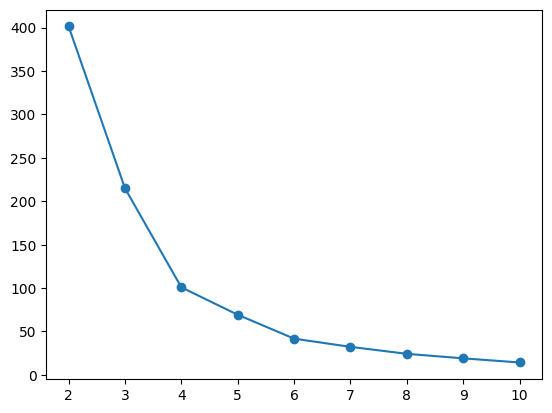

In [91]:
# Etude de l'inertie des données
inertie = []
for k in range (2,11):
    model = KMeans(n_clusters=k, n_init = 10)
    model.fit(X)
    inertie.append(model.inertia_)

cluster = [2,3,4,5,6,7,8,9,10]
plt.plot(cluster, inertie, marker='o')
plt.show()

- **La cassure semble être au niveau 3 ou 4.**

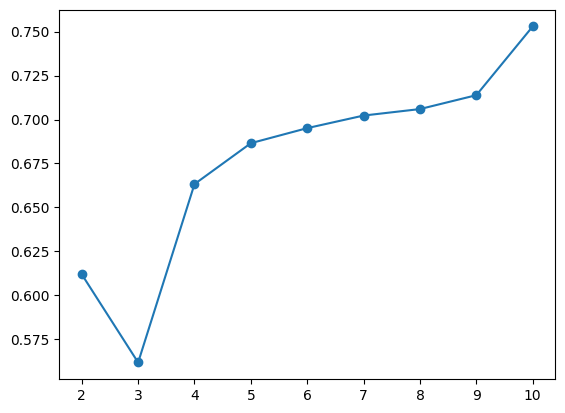

In [92]:
# Etude de la silhouette des données :
silhouette = []
for k in range(2,11):
    model = KMeans(n_clusters=k, random_state=3, n_init = 10)
    model.fit(X)
    silhouette.append(silhouette_score(X, model.labels_))
    
cluster = [2,3,4,5,6,7,8,9,10]
plt.plot(cluster, silhouette, marker='o')
plt.show()

- **Ne trouvant un point de rupture, je vais tester à 9 clusters.**

In [93]:
# Création du model Kmeans :
model = KMeans(n_clusters=9, n_init = 10)
clusters = model.fit_predict(X)
DataFinal['EnvironnementGrade'] = clusters

In [94]:
# Etude des Centroides :
Centroide = model.cluster_centers_
Centroide = pd.DataFrame(Centroide)
Centroide.columns = X.columns
Centroide = Centroide.sort_values('EnvironnementScore', ascending = False)
Centroide

EnvironnementScore
4            0.861578
1            0.725529
8            0.666282
6            0.600169
3            0.543000
0            0.438483
7            0.380441
2            0.259280
5            0.124822

- **Les grades ne sont donc pas dans le bonne ordre pour avoir un ordre hierarchique logique.**

In [95]:
# Réordonner les grades dans le fichier :

Centroide = Centroide.reset_index().reset_index()

GradesFaux = list(Centroide['index'])
GradesVrais = ['A', 'B', 'C', 'D', 'E','F','G','H','I']

def changgrade (value) :
    for i,j in zip(GradesFaux,GradesVrais) :
        if value == i :
            return j    

DataFinal['EnvironnementGrade'] = DataFinal['EnvironnementGrade'].apply(changgrade)

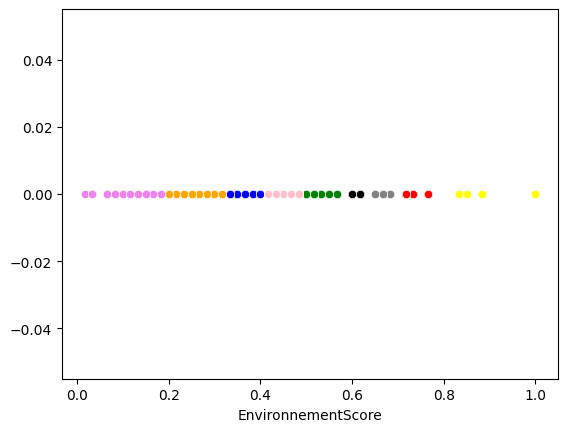

In [96]:
Grade = DataFinal['EnvironnementGrade'].unique()
Couleurs = ['red','blue', 'yellow','green','pink', 'black', 'orange','grey','violet']

for G, C in zip(Grade, Couleurs):
    Data = DataFinal[DataFinal['EnvironnementGrade'] == G]
    sns.scatterplot(x = Data['EnvironnementScore'], y = 0, color = C)
plt.show()

## 7.3 : Test Stat

In [97]:
# Test de Tukey pour voir différence entre les groupes :
Stat = DataFinal[['OriginesIngredients','Production','LabelsBio','HuileDePalme','Packaging','NbAdditifs','EnvironnementGrade']]

Valeurs = []
Groups = []

for i in (Stat['EnvironnementGrade'].unique()):
    for listes in (Stat[Stat['EnvironnementGrade'] == i].iloc[:,:-1].values.tolist()):
        for valeur in listes:
            Valeurs.append(valeur)
            Groups.append(i)
            
dict = {'Valeurs': Valeurs, 'Groups': Groups}
df = pd.DataFrame(dict) 

In [98]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

pairwise_tukeyhsd(df["Valeurs"], df["Groups"])._results_table

<class 'statsmodels.iolib.table.SimpleTable'>

- **Les groupes sont significativement différents.**

## 7.4 : Test sur un produit fictif

In [99]:
ProduitTest

OriginesIngredients  Production  LabelsBio  HuileDePalme  Packaging  \
1                  0.3         0.3          0           1.0        1.0   

   NbAdditifs  
1         1.0

In [100]:
EnvironnementScore = ProduitTest.mean(axis = 1).values
EnvironnementGrade = model.predict([EnvironnementScore])[0]
EnvironnementGrade

print(EnvironnementScore, changgrade(EnvironnementGrade))

[0.6] D


C:\Users\Johan\Formation DS OPC\Projet 3\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# 8 : Création de Radar:

## 8.1 : Radar sur les groupes du KMeans

In [101]:
VariableEnv = DataFinal[['OriginesIngredients','Production','LabelsBio','HuileDePalme','Packaging','NbAdditifs', 'EnvironnementGrade']]
VariableEnv = VariableEnv.groupby('EnvironnementGrade').mean()
VariableEnv

OriginesIngredients  Production  LabelsBio  HuileDePalme  \
EnvironnementGrade                                                             
A                              0.783900    0.950353   0.609365      0.997691   
B                              0.372434    0.702083   0.425051      0.996672   
C                              0.739399    0.889543   0.208316      0.987114   
D                              0.304622    0.305209   0.159188      0.988275   
E                              0.330294    0.633458   0.093335      0.946976   
F                              0.312249    0.331352   0.090966      0.824749   
G                              0.276122    0.401692   0.021411      0.737541   
H                              0.304549    0.357288   0.002363      0.380298   
I                              0.273746    0.231323   0.000000      0.123159   

                    Packaging  NbAdditifs  
EnvironnementGrade                         
A                    0.828736    0.999423  
B                    0.858206    0.998730  
C                    0.199259    0.974063  
D                    0.849966    0.993754  
E                    0.343449    0.910487  
F                    0.246079    0.825502  
G                    0.226448    0.619433  
H                    0.181007    0.330173  
I                    0.006297    0.114408

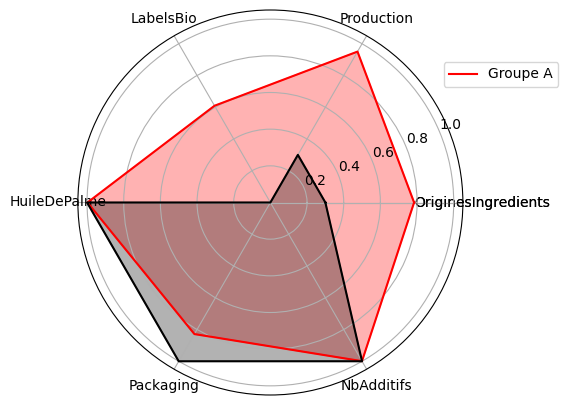

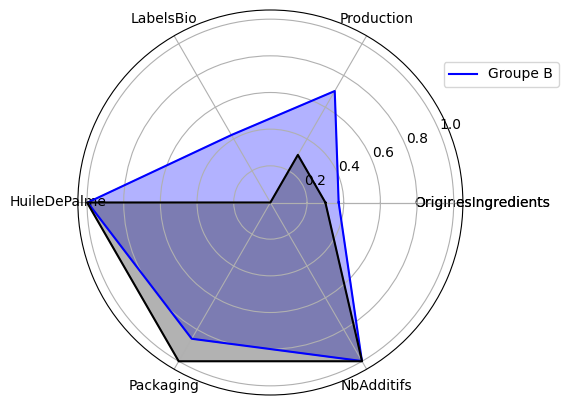

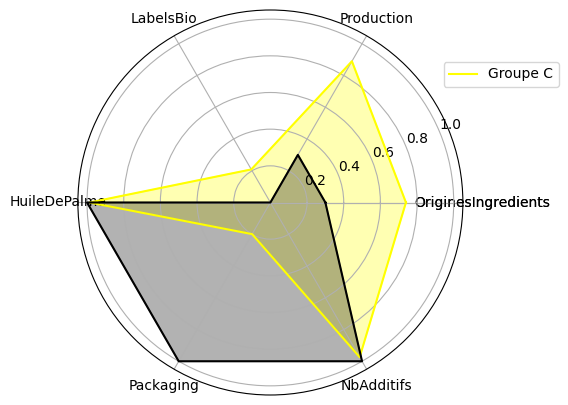

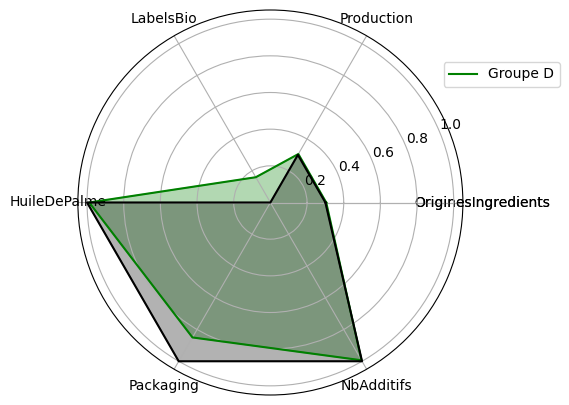

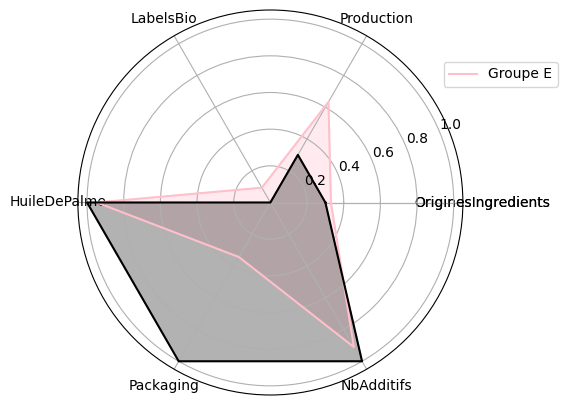

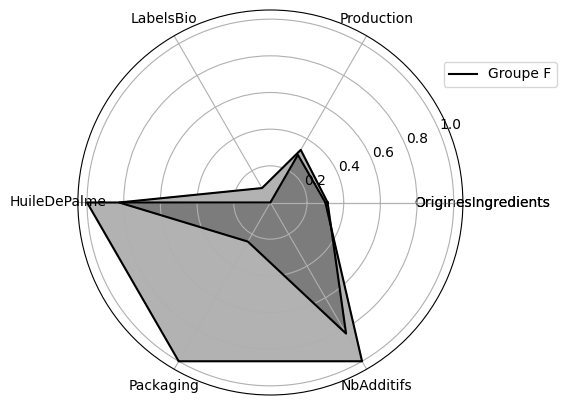

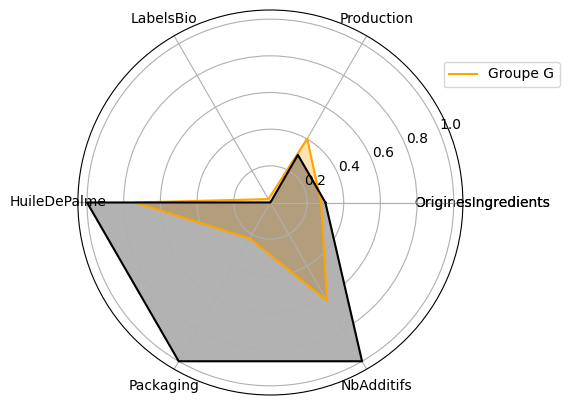

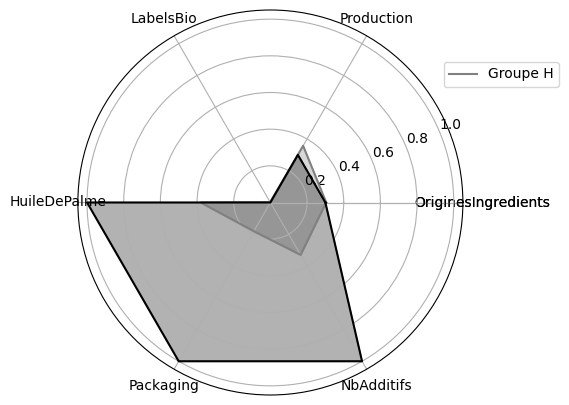

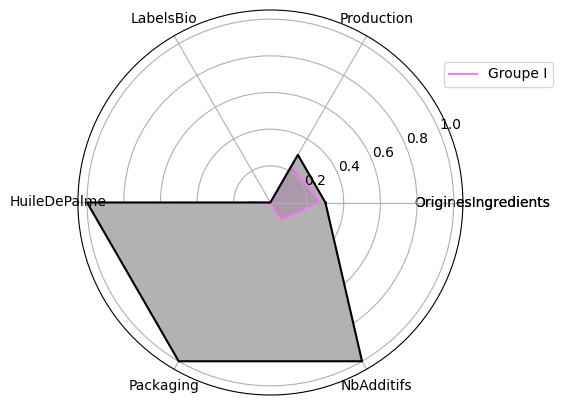

In [102]:
Produit = ProduitTest.T
Line = Produit.iloc[:1,:]
Produit = pd.concat([Produit, Line])

Variable = list(VariableEnv.columns)
Variable.append(Variable[0])

Analyse = VariableEnv.T 
Line = Analyse.iloc[:1,:]
Analyse = pd.concat([Analyse,Line])
Colonne = Analyse.columns

Couleurs = ['red','blue', 'yellow','green','pink', 'black', 'orange','grey','violet']

for i,j in zip(Colonne, Couleurs):
    label_placement = np.linspace(start = 0, stop = 2*np.pi, num = len(Variable))
    plt.figure(figsize = (15,5))
    plt.subplot(polar = True)
    plt.plot(label_placement, Analyse[i], color = j)
    plt.fill(label_placement, Analyse[i], alpha=0.3, color = j)
    plt.plot(label_placement, Produit[1], color = 'black')
    plt.fill(label_placement, Produit[1], alpha=0.3, color = 'black')

    lines, labels = plt.thetagrids(np.degrees(label_placement), labels = Variable)
    plt.legend(labels = ['Groupe {}'.format(i)], loc = (0.95,0.8))
    plt.show()

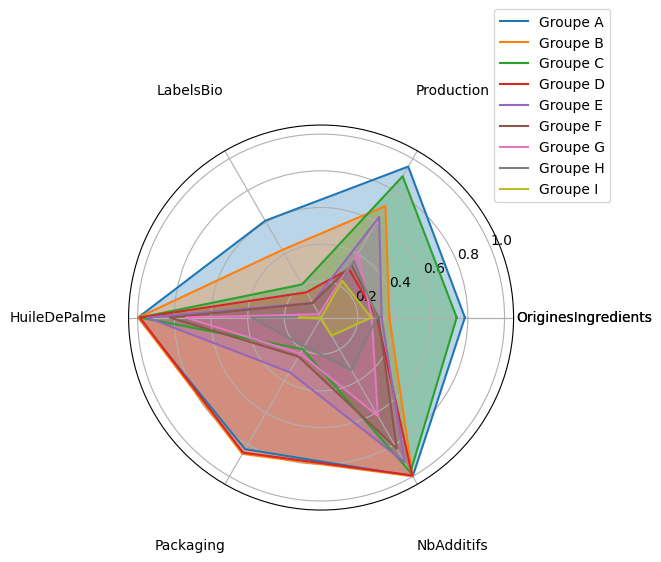

In [103]:
# Plot des variables :
Variable = list(VariableEnv.columns)
Variable.append(Variable[0])

label_placement = np.linspace(start = 0, stop = 2*np.pi, num = len(Variable))
plt.figure(figsize = (15,5))
plt.subplot(polar = True)
plt.plot(label_placement, Analyse)
plt.fill(label_placement, Analyse, alpha=0.3)

lines, labels = plt.thetagrids(np.degrees(label_placement), labels = Variable)

plt.tick_params(axis='both', which='major', pad=40)
plt.legend(labels = ['Groupe A', 'Groupe B', 'Groupe C', 'Groupe D', 'Groupe E', 'Groupe F', 'Groupe G', 'Groupe H', 'Groupe I'], loc = (0.95,0.8))
plt.show()

## 8.2 : Mesure de la surface du radar de chaque produit et création de groupes en KMeans

In [104]:
df = DataFinal[DonneesEnv].reset_index(drop = True).T.reset_index()
df

index    0    1    2    3    4    5    6    7    8    9   10  \
0  OriginesIngredients  1.0  0.3  1.0  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3   
1           Production  0.3  0.0  1.0  0.0  1.0  0.3  0.3  0.3  0.3  0.3  0.3   
2            LabelsBio  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3         HuileDePalme  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.3   
4            Packaging  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0   
5           NbAdditifs  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.3   

    11   12   13   14   15   16   17   18   19   20   21   22   23   24   25  \
0  0.0  1.0  0.3  0.3  0.3  0.3  1.0  0.3  0.0  1.0  0.3  0.3  0.3  0.3  0.3   
1  1.0  1.0  1.0  0.3  1.0  0.3  1.0  1.0  0.3  0.3  0.3  1.0  0.3  0.0  0.3   
2  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
4  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.3  0.0  1.0   
5  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

    26   27   28   29   30   31   32   33   34   35   36   37   38   39   40  \
0  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  1.0  0.3  0.3  0.3  0.3   
1  0.3  0.3  0.3  1.0  0.3  0.3  0.0  0.3  1.0  0.3  1.0  0.0  0.3  0.0  0.3   
2  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0   
3  0.3  1.0  0.3  1.0  1.0  1.0  1.0  1.0  0.1  1.0  1.0  1.0  1.0  1.0  1.0   
4  0.3  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0   
5  0.3  1.0  0.3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

    41   42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
0  1.0  0.3  0.3  0.3  0.0  0.0  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3   
1  0.3  0.3  0.3  0.3  0.3  0.3  1.0  0.3  0.3  0.3  0.3  0.3  0.3  1.0  1.0   
2  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
4  0.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.3  0.0  1.0   
5  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

    56   57   58   59   60   61   62   63   64   65   66   67   68   69   70  \
0  0.3  0.3  0.3  0.3  0.0  0.3  0.0  0.0  0.3  0.3  0.3  0.3  0.3  0.3  0.3   
1  0.3  1.0  0.3  0.3  0.0  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.0   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  0.3  1.0  1.0  1.0  0.3  1.0  1.0  1.0  1.0  1.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0   
5  1.0  1.0  1.0  1.0  1.0  0.3  1.0  1.0  1.0  0.3  1.0  0.1  1.0  1.0  1.0   

    71   72   73   74   75   76   77   78   79   80   81   82   83   84   85  \
0  1.0  0.3  0.0  1.0  0.3  0.3  0.3  0.0  0.3  0.0  0.0  0.0  0.0  0.3  1.0   
1  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.3  0.0  1.0  1.0  1.0  1.0  0.3  1.0   
2  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0   
5  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

    86   87   88   89   90   91   92   93   94   95   96   97   98  ...  \
0  0.0  0.3  0.3  0.3  0.3  0.0  1.0  0.3  0.3  0.3  0.3  0.3  1.0  ...   
1  1.0  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  1.0  0.3  ...   
2  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...   
3  1.0  0.3  1.0  1.0  1.0  1.0  1.0  1.0  0.3  0.3  1.0  1.0  1.0  ...   
4  0.0  0.3  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...   
5  1.0  0.3  0.1  1.0  0.1  1.0  1.0  1.0  0.3  0.3  1.0  1.0  1.0  ...   

   39641  39642  39643  39644  39645  39646  39647  39648  39649  39650  \
0    0.3    0.3    0.3    0.3    0.3    0.3

In [105]:
import shapely

surface = []

for P in tqdm(range(0,df.shape[1]-1)):
    df['produit'] = 'A'
    # convert theta to be in radians
    df = df.sort_values(P).reset_index(drop = True)
    df["index_n"] = pd.factorize(df["index"])[0]
    df["index_radian"] = (df["index_n"] / (df["index_n"].max() + 1)) * 2 * np.pi
    # work out x,y co-ordinates
    df["x"] = np.cos(df["index_radian"]) * df[P]
    df["y"] = np.sin(df["index_radian"]) * df[P]

    df_a = df.groupby("produit").apply(lambda d: shapely.geometry.MultiPoint(list(zip(d["x"], d["y"]))).convex_hull.area)
    surface.append(df_a.values[0])

100%|████████████████████████████████████████████████████████████████████████████| 39741/39741 [13:42<00:00, 48.33it/s]


In [106]:
# Merge des données : 
Surface = pd.DataFrame(surface)
Surface = Surface.rename(columns = {0 : 'Surface'})
DataFinal = DataFinal.reset_index(drop = True)
DataFinal = pd.merge(DataFinal, Surface, left_index = True, right_index = True)

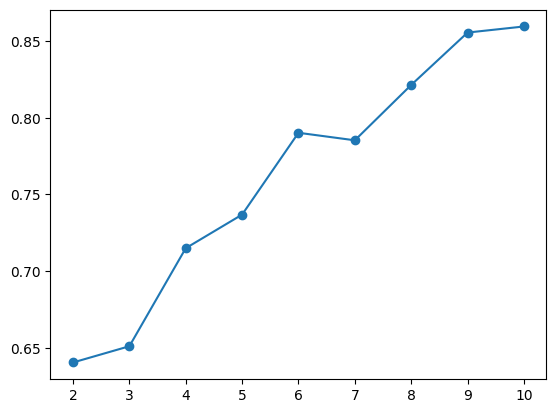

In [107]:
X = DataFinal[['Surface']]

# Etude de la silhouette des données :
silhouette = []
for k in range(2,11):
    model = KMeans(n_clusters=k, random_state=3, n_init = 10)
    model.fit(X)
    silhouette.append(silhouette_score(X, model.labels_))
    
cluster = [2,3,4,5,6,7,8,9,10]
plt.plot(cluster, silhouette, marker='o')
plt.show()

In [108]:
# Création du model Kmeans :
model = KMeans(n_clusters=9, n_init = 10)
clusters = model.fit_predict(X)
DataFinal['EnvironnementGradeRadar'] = clusters

In [109]:
# Etude des Centroides :
Centroide = model.cluster_centers_
Centroide = pd.DataFrame(Centroide)
Centroide.columns = X.columns
Centroide = Centroide.iloc[:,-1:].sort_values('Surface', ascending = False)
Centroide

Surface
3  2.207559
1  1.565697
6  1.301787
7  1.165906
2  1.000855
8  0.845715
5  0.596526
0  0.412221
4  0.147480

- **Les grades ne sont pas dans le bon ordre.**

In [110]:
# Réordonner les grades dans le fichier :

Centroide = Centroide.reset_index().reset_index()

GradesFaux = list(Centroide['index'])
GradesVrais = ["A",'B','C','D','E','F','G','H','I']

def changgrade (value) :
    for i,j in zip(GradesFaux,GradesVrais) :
        if value == i :
            return j    

DataFinal['EnvironnementGradeRadar'] = DataFinal['EnvironnementGradeRadar'].apply(changgrade)

In [111]:
len(DataFinal[DataFinal['EnvironnementGrade'] != DataFinal['EnvironnementGradeRadar']])/len(DataFinal)*100

39.42276238645228

In [112]:
# Comparaison des radars entre les deux façons de créer les groupes via KMeans.
VariableEnv2 = DataFinal[['OriginesIngredients','Production','LabelsBio','HuileDePalme','Packaging','NbAdditifs','EnvironnementGradeRadar']]
VariableEnv2 = VariableEnv2.groupby('EnvironnementGradeRadar').mean()
VariableEnv2

OriginesIngredients  Production  LabelsBio  \
EnvironnementGradeRadar                                               
A                                   0.783900    0.950353   0.609365   
B                                   0.372434    0.702083   0.425051   
C                                   0.761304    0.919565   0.163913   
D                                   0.305872    0.306595   0.182954   
E                                   0.341265    0.629392   0.074516   
F                                   0.300989    0.596826   0.146722   
G                                   0.300791    0.361089   0.013897   
H                                   0.260986    0.346466   0.287671   
I                                   0.297896    0.329640   0.001944   

                         HuileDePalme  Packaging  NbAdditifs  
EnvironnementGradeRadar                                       
A                            0.997691   0.828736    0.999423  
B                            0.996672   0.858206    0.998730  
C                            0.992174   0.187826    0.978391  
D                            0.985692   0.837336    0.991017  
E                            0.963603   0.353138    0.946730  
F                            0.852914   0.343184    0.764360  
G                            0.854367   0.178330    0.804610  
H                            0.464219   0.460274    0.407068  
I                            0.328782   0.144929    0.284700

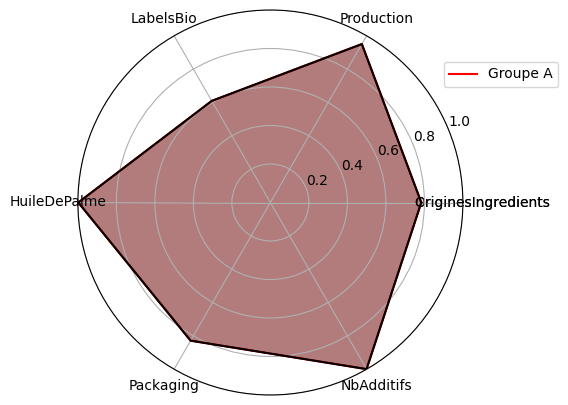

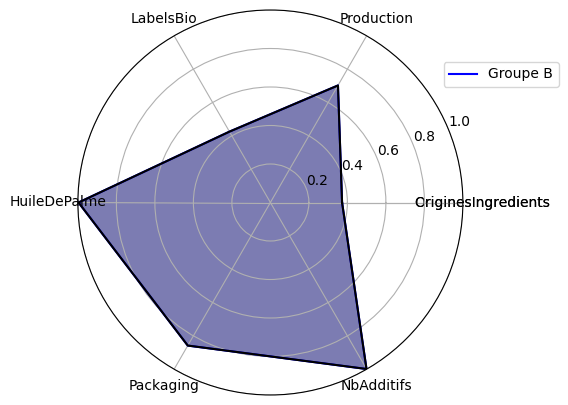

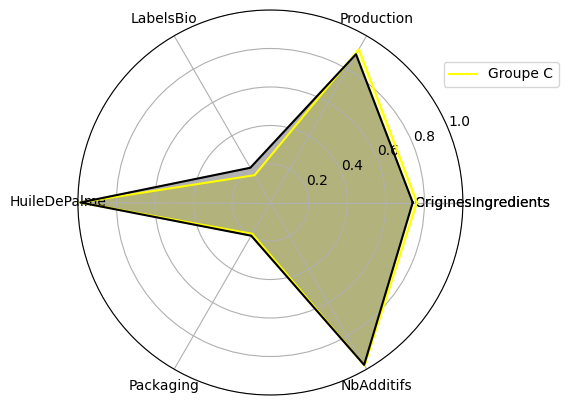

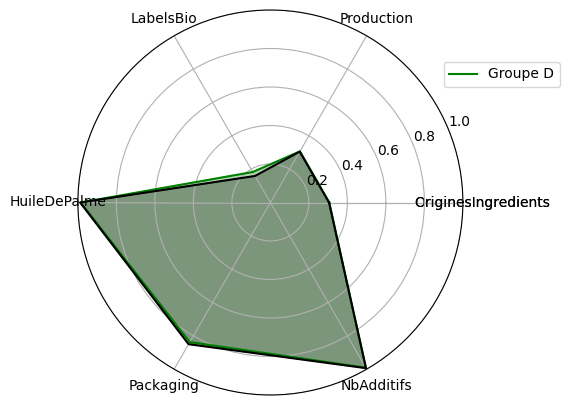

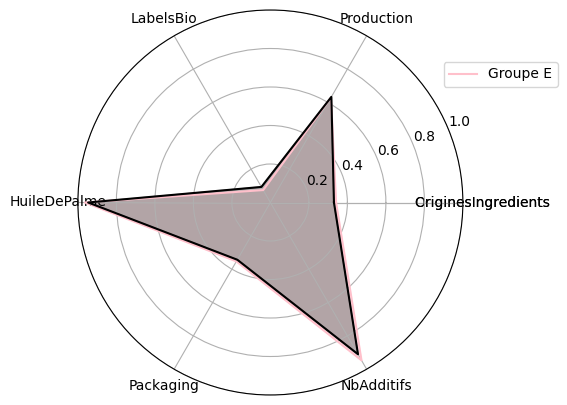

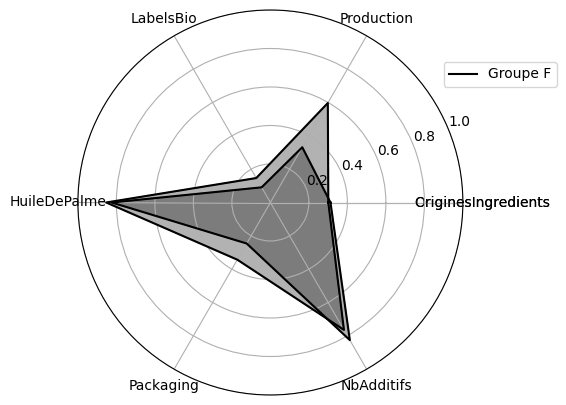

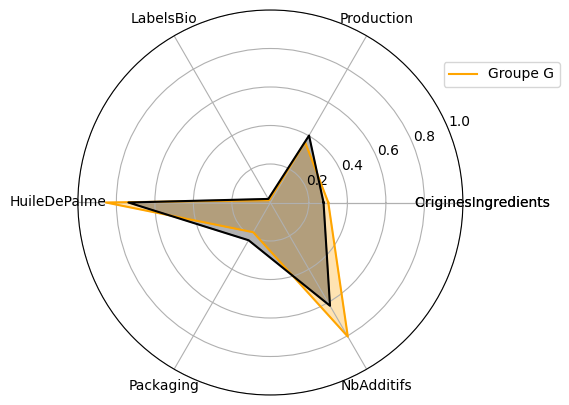

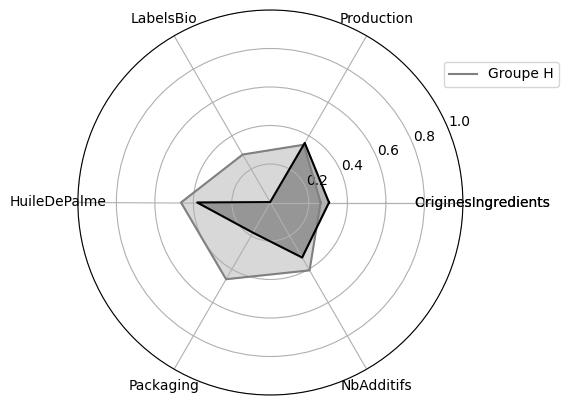

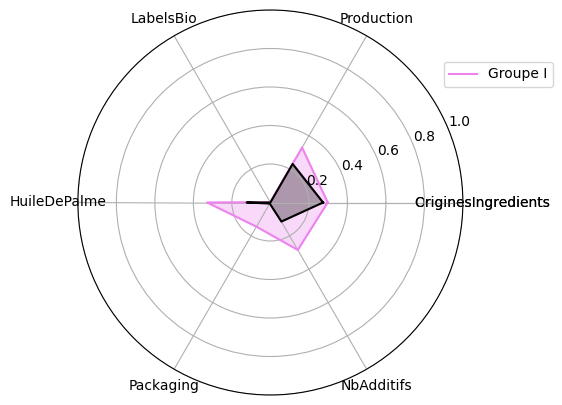

In [113]:
Produit = ProduitTest.T
Line = Produit.iloc[:1,:]
Produit = pd.concat([Produit, Line])

Variable = list(VariableEnv2.columns)
Variable.append(Variable[0])

Analyse2 = VariableEnv2.T 
Line = Analyse2.iloc[:1,:]
Analyse2 = pd.concat([Analyse2,Line])
Colonne = Analyse2.columns

Couleurs = ['red','blue', 'yellow','green','pink', 'black', 'orange','grey','violet']

for i,j in zip(Colonne, Couleurs):
    label_placement = np.linspace(start = 0, stop = 2*np.pi, num = len(Variable))
    plt.figure(figsize = (15,5))
    plt.subplot(polar = True)
    plt.plot(label_placement, Analyse2[i], color = j)
    plt.fill(label_placement, Analyse2[i], alpha=0.3, color = j)
    plt.plot(label_placement, Analyse[i], color = 'black')
    plt.fill(label_placement, Analyse[i], alpha=0.3, color = 'black')
    plt.ylim(0,1)

    lines, labels = plt.thetagrids(np.degrees(label_placement), labels = Variable)
    plt.legend(labels = ['Groupe {}'.format(i)], loc = (0.95,0.8))
    plt.show()

- **On observe quasiment aucune différence.**

## 8.3 : Analyse de l'environnement Grade par groupe de produit

In [114]:
Groupe = DataFinal[['pnns_groups_2','EnvironnementGrade']]
Groupe = pd.crosstab(Groupe['pnns_groups_2'], Groupe['EnvironnementGrade'])
Groupe['Total'] = Groupe.sum(axis = 1)
Groupe = Groupe.sort_values('Total', ascending = False)
Groupe.style.highlight_max(axis=0, color='red').highlight_min(axis=0, color='yellow')

In [115]:
# Pour l'application : 
DFBest = DataFinal[DataFinal['pnns_groups_2'] == 'Céréales']
GroupeBest = pd.crosstab(DFBest['EnvironnementGrade'], DFBest['nutrition_grade_fr'])
GroupeBest

nutrition_grade_fr    a   b   c   d  e
EnvironnementGrade                    
A                    78  28   9   3  0
B                   211  60  26  11  1
C                    84  10  14   5  0
D                   222  44  23  22  3
E                   405  82  47  37  3
F                   316  54  39  37  3
G                   250  69  58  25  6
H                    82  26  38  22  9
I                     6  17  23  13  8

In [116]:
DFBest['main_category_fr'].value_counts()

Pâtes alimentaires                         1064
Aliments et boissons à base de végétaux     630
Riz                                         319
Plats à base de viande                      125
Farines de blé                               83
Conserves                                    80
Coquillettes                                 78
Produits labellisés                          47
Farines                                      35
Pates                                        32
Produits à tartiner                          12
Petit-déjeuners                               6
Aliments pour bébé                            4
Surgelés                                      4
Condiments                                    2
Quenelles                                     2
Sans-gluten                                   1
Epices                                        1
Salades composées                             1
Saumons                                       1
Desserts                                

- **Il y a des produits bisarres dans cette catégories, est ce le cas des autres???.**
- **Valable aussi pour le Fromage...**

In [117]:
DFSousGroupeBest = DFBest[DFBest['main_category_fr'] == 'Pâtes alimentaires']

SousGroupeBest = pd.crosstab(DFSousGroupeBest['EnvironnementGrade'], DFBest['nutrition_grade_fr'])
SousGroupeBest

nutrition_grade_fr    a   b   c   d  e
EnvironnementGrade                    
A                    14   1   1   1  0
B                    57  16  12   1  0
C                    44   4   6   1  0
D                    48   8   7   3  0
E                   198  29  24  10  0
F                   200  20  25  22  0
G                   150  19  36   9  1
H                    39  11  22   9  0
I                     6   3   4   3  0

In [118]:
DfSSGB = DFSousGroupeBest[DFSousGroupeBest['product_name'].str.contains('Spaghetti|spaghetti')]

SSGB = pd.crosstab(DfSSGB['EnvironnementGrade'], DFBest['nutrition_grade_fr'])
SSGB

nutrition_grade_fr   a  b  c  d
EnvironnementGrade             
B                   13  0  0  0
C                    9  0  0  0
D                    5  1  0  1
E                   29  1  0  0
F                   29  2  1  0
G                   25  1  0  0
H                    9  0  0  0

In [119]:
IndexBest = DfSSGB.sort_values('EnvironnementGrade').sort_values('nutrition_grade_fr').head(1).index[0]

In [120]:
IndexBest = DfSSGB.sort_values('EnvironnementGrade').sort_values('nutrition_grade_fr').head(1).index[0]

from IPython import display

print('\033[1m' + 'Nous vous proposons les choix suivants :' + '\033[0m')
print()
print()

for index in [IndexBest]:
    print('\033[1m' +'Nom du produit:'+ '\033[0m', DataFinal['product_name'][index])
    print('\033[1m' +'Marque du produit:'+ '\033[0m', DataFinal['brands_tags'][index].capitalize())
    print('\033[1m' +'Composition du produit :'+ '\033[0m', DataFinal['ingredients_text'][index])
    print('\033[1m' +'Allergènes repertoriés :'+ '\033[0m', DataFinal['allergens'][index])
    print('\033[1m' +"Traces rerpertoriés :"+ '\033[0m',DataFinal['traces_fr'][index])
    print('\033[1m' +"Nutrigrade :"+ '\033[0m', DataFinal['nutrition_grade_fr'][index])
    print('\033[1m' +"EnvironnementGrade :"+ '\033[0m', DataFinal['EnvironnementGrade'][index])
    print('\033[1m' +"Pour de plus amples renseignements :"+ '\033[0m', DataFinal['url'][index])
    display.Image(DataFinal['image_small_url'][index])

Nous vous proposons les choix suivants :


Nom du produit: Spaghetti longs aux œufs frais
Marque du produit: Lustucru,pastacorp
Composition du produit : Semoule de _blé_ dur de qualité supérieure, _œufs_ frais (13,5 %).
Allergènes repertoriés : blé, œufs
Traces rerpertoriés : Non Communiqué
Nutrigrade : a
EnvironnementGrade : B
Pour de plus amples renseignements : http://world-fr.openfoodfacts.org/produit/3660861025658/spaghetti-longs-aux-oeufs-frais-lustucru
